# Workshop Overview
### Goals:
* offer hands on experience with structured, longitudinal clinical data that is representative (messy)
* discuss insights into data cleaning that I have found to be useful
* Overivew and practice three techniques in data manipulation using pandas
* have some fun with a task that is often dreaded

### Agenda
1. Introduce a basic clinical datascience workflow structure
2. Describe the dataset (MIMIC-III subset)
3. Discuss and practice four core techniques in pandas to improve datacleaning skills [MAYBE MAKE TO 3]
    * slicing
    * joins
    * groupby & apply
    * pivot
4. provide a annotated demo of a short clinical datascience workflow for later reference (datacleaning, preprocessing, modeling, and model evaluation)

### Inspiration
* prediction task & workflow inspired by: https://github.com/alistairewj/challenge2012/blob/master/prepare-data.ipynb
* my own research: https://github.com/geickelb/mimiciii-antibiotics-opensource

## notes from christina:
* good rule: minute or 2 minutes per line of code. 
* one notebook with placeholder cells. 
* make sure it's super simple. 
* need to decide demo vs handson:
    * if interactive:
        * three big things i want to show. 

----------
# 1. Introduce components of a basic clinical datascience workflow
----------

### Example workflow:
<img src="../images/mimic_workflow_workshop2.png"
     alt="Markdown Monster icon"
     height=1000
     width= 1500
     style="float: left; margin-right: 0.5px;" />

### Example Extracted Visualization:
<img src="../images/async_uneven_imbalanced.png" 
     height=500
     width= 500
     alt="Example Visualization of a Snapshot (aggregated) Prediction Model" 
     title="Snapshot Variable Prediction Model" />

### Variable Aggregation Visualization
<img src="../images/Aggregate_vis.png" 
     height=500
     width= 750
     alt="Example Visualization of a Snapshot (aggregated) Prediction Model" 
     title="Snapshot Variable Prediction Model" />

### Example of 72, 48, and 24hr Clinical Variable Snapshot Models:
<img src="../images/timewindows.png" 
     height=400
     width= 650
     alt="Example Visualization of a Snapshot (aggregated) Prediction Model" 
     title="Snapshot Variable Prediction Model" />

----------
# 2. Describe our dataset & workflow
----------

## Dataset
#### Source:
* https://physionet.org/content/challenge-2012/1.0.0/

#### Description:
* **MIMIC-III**:  
    * de-identified ICU dataset from Beth Israel Deaconess Medical Center
    * containing 12 years of patient care data (2001-2012)
    * data on over 61,000 ICU stays
* **Physionet 2012 challenge dataset**:
    * Subset of patients and variables from MIMIC-III dataset
    * **does not require all participants to sign up for a physionet account**
    * data on ~4,000 ICU stays
    * note: I have made some modifications to the origional challenge data to make it more easily usable


## Data Ingestion:

#### Cohort (already done for us)
* **Inclusion**
    * All patients were adults who were admitted for a wide variety of reasons to cardiac, medical, surgical, and trauma ICUs. 
* **Exclusion**
    * ICU stays of less than 48 hours
* **Outcomes**
    * Multiple outcomes are provided (see documentation)
    * Our chosen outcome: In Hospital Mortality (y/n)

#### Data Extraction (already done for us)
* **Structured Variables**
    * Up to 42 variables were recorded at least once during the first 48 hours after admission to the ICU. 
    * Sparce: Not all variables are available in all cases
    * Static variables: 6 of these variables are general descriptors (collected on admission)
    * Longitudinal variables: 36 longitudinal time series variables (multiple observations may be available)
    * time stamp: time after ICU admission (HH:MM) 


#### Data Cleaning (TODO)
#### Preprocessing( TODO)
## Modeling (see modeling.ipynb)
## Model Evaluation (see modeling.ipynb)

-------
# 3. Discuss and practice four core techniques in pandas to improve datacleaning skills [MAYBE MAKE TO 3]
    * slicing
    * joins
    * groupby & apply
    * pivot
    
-------

# The preamble python stuff: importing the packages and datasets

In [1]:
import pandas as pd # a brilliant package for data manipulation & analysis, this package introduces a "dataframe" similar to that in R.
import os # default package that is included with python, helpful for filepath stuff. 
import numpy as np # a foundational package for  arrays, matricies, and associated mathmatical operations
import matplotlib.pyplot as plt # a foundational plotting and datavisualization library, highly customizable, but a bit less user friendly
import seaborn as sns # a newer plotting library, less customizable, but has better default settings & is much easier to plug and play

In [12]:
df = pd.read_csv('../data/predictors.csv')
y = pd.read_csv('../data/outcomes.csv')

### for debugging if above doesn't work
# os.getcwd() #useful command to see what your current working directory (or implied) is. 
# os.chdir(path) #command to change the CWD, where path should be to the MIMIC-III_to_Model base folder. for me source ='/Users/geickelb1/Documents/GitHub/MIMIC-III_to_Model/'

<br>
lets get a quick sense of what the data looks like and what the columns mean:

In [33]:
df.head(5)  #show the first 5 rows of the dataframe

,time,parameter,value,recordid
0,00:00,RecordID,144404.0,144404
1,00:00,Age,71.0,144404
2,00:00,Gender,1.0,144404
3,00:00,Height,172.7,144404
4,00:00,ICUType,4.0,144404


column descriptions:
* time: the amount of time that has passed since ICU admission
* parameter: the name of the parameter in question
* value: value of the parameter in question
* recordid: the foreign key tied to each unique ICU admission/stay

<a id="Data_Cleaning"></a>
# Data Cleaning

### things to ask:
1. how **is** the data formatted & how **should** it be formatted?
1. Do we need to seperate longitudinal and static variables?
1. are there duplicates or missing values?
1. are there a mix of static and longitudinal varibles? 
1. ...

[Data Cleaning](#Data_Cleaning)
## Let's start to answer these and learn some techniques to help
    * slicing
    * joins
    * groupby & apply
    * pivot

In [78]:
# making a new smaller dataframe (first 10 rows of df) to make playing around with slicing more friendly. 
slice_df= df.head(5).copy()

In [79]:
slice_df

,time,parameter,value,recordid
0,00:00,RecordID,144404.0,144404
1,00:00,Age,71.0,144404
2,00:00,Gender,1.0,144404
3,00:00,Height,172.7,144404
4,00:00,ICUType,4.0,144404


## slicing: selecting a dataframes row(s) and or column(s)
* helpful resources:
    * https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
    * https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/

* simple slicing:
  * df['col'] == df.col
  * df[['col1','col2','col3']]
  * df['row']


In [63]:
#column slice method 1
slice_df['value']

0    144404.0
1        71.0
2         1.0
3       172.7
4         4.0
Name: value, dtype: float64

In [64]:
#column slice method 2
slice_df.value

0    144404.0
1        71.0
2         1.0
3       172.7
4         4.0
Name: value, dtype: float64

In [65]:
#multi column slice 
slice_df[['value', 'parameter']]

,value,parameter
0,144404.0,RecordID
1,71.0,Age
2,1.0,Gender
3,172.7,Height
4,4.0,ICUType


In [66]:
#row slice
slice_df[1:2] #row index starting at 1 and ending at 1 (python reads n-1 for final index)

,time,parameter,value,recordid
1,00:00,Age,71.0,144404


* Perferred slicing syntax:
  * df.loc[row,col] 
      * same as above, but you specify the row and column slice, where : == all. 
      * row and col can be lots of different formats (see documentation). 
      * common formats: list of names or rows/cols of interest, or a list of booleans (True/False)

In [67]:
#column slice method 1
slice_df.loc[:,'value']

0    144404.0
1        71.0
2         1.0
3       172.7
4         4.0
Name: value, dtype: float64

In [68]:
#multi column slice 
slice_df.loc[:,['value', 'parameter']]

,value,parameter
0,144404.0,RecordID
1,71.0,Age
2,1.0,Gender
3,172.7,Height
4,4.0,ICUType


In [69]:
#combined multi column and row slice 
slice_df.loc[1:2,['value', 'parameter']]

,value,parameter
1,71.0,Age
2,1.0,Gender


In [71]:
# boolean slice:
slice_df.loc[:,[True,False, True, False]]

,time,value
0,00:00,144404.0
1,00:00,71.0
2,00:00,1.0
3,00:00,172.7
4,00:00,4.0


### Conditional Slicing: filtering a dataframes row(s) and or column(s) to match conditional statement(s) 
* assigning conditional statements to regular slicing:
    * returns boolean list (length of columnns or rows)
    * EX:
        * df.loc[row,col]== condition
        * df['col']== condition
    * returns boolean list (length of columnns or rows)
* Can use another slice on the output boolean list to FILTER a dataframe:
    * df[df['col']==condition]
    * df.loc[:, df['col']==condition]

In [72]:
slice_df.loc[:,'parameter']=='Age'
# slice_df['parameter']=='Age' # also works

0    False
1     True
2    False
3    False
4    False
Name: parameter, dtype: bool

In [80]:
###show all rows where the value in the parameter column == 'Age'
slice_df.loc[slice_df.loc[:,'parameter']=='Age',:] 
# slice_df[slice_df['parameter']=='Age']   #also works

,time,parameter,value,recordid
1,00:00,Age,71.0,144404


### Slicing, asignment and new dataframes
* slicing can also be used to add a new column, or modify values in conditional rows of a column
    * df['newcol']=df['value']+5
* can be used to make a subset dataframe:
    * df2=df[df['value']>5]
* **NOTE**: for storage, pandas stores the df2 above as a REFERENCE to the origional df, and not as a filtered copy of it. this can cause instances where changing a value in df, will change same value in df2
* to make new independent df, add .copy() at the end:  df2=df[df['value']>5].copy()



In [81]:
# make a new dataframe of all rows where the value in slice_df is >5:
slice_df2= slice_df.loc[slice_df.loc[:,'value']>5,:].copy()

,time,parameter,value,recordid
0,00:00,RecordID,144404.0,144404
1,00:00,Age,71.0,144404
3,00:00,Height,172.7,144404


In [ ]:
# Examples: 
## give me only rows where parameter is = to either Age or Gender


<details> 
  <summary> 1. how is the data formatted?(click here to reveal answer)<b> </summary>
   A1: long format 
</details>

2. Do we need to seperate longitudinal and static variables?

3. are there duplicates or missing values?

2. are there a mix of static and longitudinal varibles? 


In [29]:
### longformat
(pd.pivot_table(df, values='value', index='recordid', columns='parameter') #make a pivot table w/ the new index=recordid, the columns= unique values in parameter, and the values = value
     .reset_index().rename_axis(None, axis=1) #by default it makes a multilevel index, which is a headache to deal with. this removes the multilevel
             .head() #show the first 5 rows of the dataframe
) 


,recordid,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,142675,23.0,99.5,708.75,70.0,2.133333,15.571429,2.04,NaN,1.242857,...,NaN,96.727273,111.555556,36.622917,NaN,NaN,312.788462,6.760000,85.000000,7.379500
1,142676,NaN,NaN,NaN,57.0,NaN,25.600000,NaN,NaN,0.460000,...,17.666667,NaN,NaN,36.550000,NaN,NaN,145.285714,18.750000,-1.000000,NaN
2,142680,77.0,48.5,27.50,60.0,NaN,22.333333,0.70,NaN,0.733333,...,NaN,93.000000,102.333333,37.918182,NaN,NaN,173.793103,14.966667,79.253191,7.401429
3,142683,44.0,876.5,1059.50,64.0,2.300000,14.666667,1.25,NaN,1.233333,...,NaN,92.666667,122.017241,37.253488,NaN,NaN,116.200000,20.487500,145.200000,7.325000
4,142688,NaN,NaN,NaN,51.0,NaN,19.000000,NaN,NaN,0.800000,...,19.162162,NaN,114.956522,37.733333,NaN,NaN,94.333333,14.250000,90.000000,7.370000


since we now know the format, lets see all of the different types of values that are recorded:

In [6]:
df['parameter'].unique() #useful function to get an array of all unique values in a list

array(['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight',
       'DiasABP', 'GCS', 'HR', 'MAP', 'NIDiasABP', 'NIMAP', 'NISysABP',
       'SysABP', 'Temp', 'Urine', 'FiO2', 'MechVent', 'pH', 'PaCO2',
       'PaO2', 'SaO2', 'Albumin', 'ALP', 'ALT', 'AST', 'Bilirubin', 'BUN',
       'Creatinine', 'Glucose', 'HCO3', 'HCT', 'Mg', 'Platelets', 'K',
       'Na', 'WBC', 'Lactate', 'Cholesterol', 'RespRate', 'TroponinT',
       'TroponinI'], dtype=object)

it looks like there are both static (RecordId, Age, Gender, Height, ICUType, Weight) & longitudinal values in this dataframe

### Next task: seperate longitudinal and static values into different dataframes for ease of managing data

to do this, we need to learn about slicing (ie row/col filtering)

### (Technique): slicing (ie row/col filtering) 
* Perferred slicing syntax:
  * df.loc[row,col] # row and col can be either a list of names or rows/cols of interest, or a list of booleans
    * (note: len(list)==len(row/col))
    * note: CAN ALSO BE USED TO MAKE A NEW COLUMN OR ROW
    
* Alternative slicing syntax:
  * df['col'] == df.col
  * df['row']
  
  
* if making an second dataframe = to subset of a primary one, be sure to use .copy():
  * df2= df1[:,['col1','col2']].copy()

In [10]:
# extract static variables into a separate dataframe. we know all static variables start at time=00:00
df_static = df.loc[df['time'] == '00:00', :].copy() #filter the dataframe to only rows with time == "00:00" and asign a copy of this to the name df_static

# retain only one of the 6 static vars:
static_vars = ['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight']
df_static = df_static.loc[df['parameter'].isin(static_vars)]

# remove these from original df
idxDrop = df_static.index
df = df.loc[~df.index.isin(idxDrop), :]

In [11]:
df_static.head(10)

,time,parameter,value,recordid
0,00:00,RecordID,144404,144404
1,00:00,Age,71,144404
2,00:00,Gender,1,144404
3,00:00,Height,172.7,144404
4,00:00,ICUType,4,144404
5,00:00,Weight,74.2,144404
428,00:00,RecordID,148558,148558
429,00:00,Age,76,148558
430,00:00,Gender,0,148558
431,00:00,Height,-1,148558


3. how **is** the data formatted & how **should** it be formatted?
    * Common Formats:
        * long format: **multiple rows per timepoint** with single value column (valuenum) and label (vitalid);  (generic example:)
            * ![long_format](../images/long_format.png)
        * wide format: **one row per timepoint** with a column for each measurement; (generic example:)
            * ![wide_format](../images/wide_format.png)

## investigate: are any recordid's where a parameter is listed more than once.

In [12]:
#complicated query, lets break it down:
(df_static.groupby(['recordid','parameter']) #groupby unique combinations of recordid and parameter (ie a composite key)
                 [['value']] #(in this grouped by set, look at the value column)
                     .count() #count the number of values per recordid-parameter composite key
                         .sort_values('value',ascending=False) #sort the counts in decending order.
)

value
recordid parameter       
149509   Weight         2
142675   Age            1
149427   Age            1
149428   ICUType        1
         Height         1
         Gender         1
         Age            1
149427   Weight         1
         RecordID       1
         ICUType        1
         Height         1
         Gender         1
149423   Weight         1
149428   Weight         1
149423   RecordID       1
         ICUType        1
         Height         1
         Gender         1
         Age            1
149420   Weight         1
         RecordID       1
         ICUType        1
149428   RecordID       1
149430   Age            1
149420   Gender         1
149437   Age            1
149449   ICUType        1
         Height         1
         Gender         1
         Age            1
...                   ...
146052   Height         1
         Gender         1
         Age            1
146049   Weight         1
         RecordID       1
         ICUType        1
146056   RecordID       1
146059   Age            1
146063   ICUType        1
146059   Gender         1
146063   Height         1
         Gender         1
         Age            1
146062   Weight         1
         RecordID       1
         ICUType        1
         Height         1
         Gender         1
         Age            1
146060   Weight         1
         RecordID       1
         ICUType        1
         Height         1
         Gender         1
         Age            1
146059   Weight         1
         RecordID       1
         ICUType        1
         Height         1
152864   Weight         1

[24000 rows x 1 columns]

In [13]:
# a more direct answer to the question but with less information (ie cant see which value is duplicated)
df_static.groupby(['recordid', 'parameter'])[['value']].count().max() 

value    2
dtype: int64

## finding: as seen above, there are some instances where a record id has two values for a given parameter. 
* solution: take the last value in this composite groupby. 

In [14]:
df_static = df_static.groupby(['recordid', 'parameter'])[['value']].last()
df_static.reset_index(inplace=True)

# next step: reformat from long format to wide format
* strategy: pivot table

In [15]:
# pivot on parameter so there is one column per parameter
df_static = df_static.pivot(index='recordid', columns='parameter', values='value')

df_static.head()

parameter,Age,Gender,Height,ICUType,RecordID,Weight
recordid,,,,,,
142675,70,1,175.3,2,142675,85
142676,57,0,-1,3,142676,-1
142680,60,1,182.9,3,142680,78.8
142683,64,1,180.3,2,142683,145.2
142688,51,1,172.7,4,142688,90


## ensure numerical looking data is in a 'numerical' (int, float, double, etc) format

### concept: apply and map functions.
* Map: It ITERATES OVER EACH ELEMENT of a series.
  * df['column1'].map(lambda x: 10+x), this will add 10 to each element of column1. ...
* Apply: As the name suggests, applies a function ALONG AN AXIS (rows or cols) of the DataFrame. 
  * df[[‘column1’,’column2’]].apply(sum), it will returns the sum of all the values of column1 and column2.
  * axis=0: row index;  axis=1: col index

In [16]:
df_static= df_static.apply(pd.to_numeric, axis=1) #note we have to assign the df_static to the applyed dataframe, otherwise the dataframe is not changed. 

#### looking for erroneous values
* if a value doesn't make sense we should change it to a null (np.nan) value, or another value that doesn't make sense

In [17]:
df_static.describe()

parameter,Age,Gender,Height,ICUType,RecordID,Weight
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,64.612000,0.562000,87.316975,2.807500,147740.094750,74.310632
std,17.142037,0.498717,85.879238,1.023086,2949.498256,32.839311
min,16.000000,-1.000000,-1.000000,1.000000,142675.000000,-1.000000
25%,53.000000,0.000000,-1.000000,2.000000,145157.250000,62.000000
50%,67.000000,1.000000,149.900000,3.000000,147739.000000,75.800000
75%,78.000000,1.000000,170.200000,4.000000,150285.500000,90.000000
max,90.000000,1.000000,462.300000,4.000000,152864.000000,472.000000


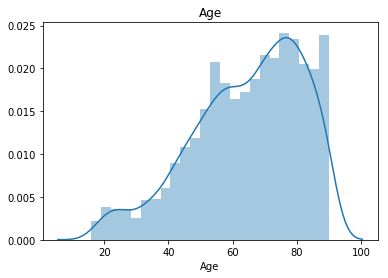

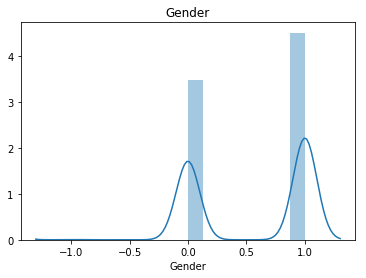

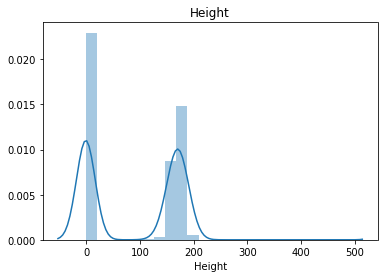

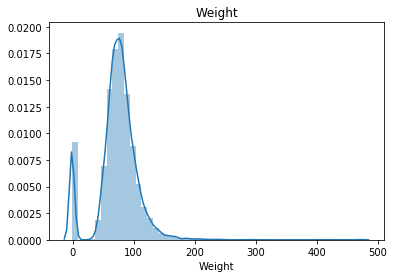

In [18]:
for element in df_static.columns:
    if element not in  ['RecordID','ICUType']:
        sns.distplot(df_static.loc[df_static[element].notnull(),element]).set_title(element)
        plt.show()

In [19]:
def error_replace(df_static, column, replacement, threshold, operator, modify_value=None):
    
    """returns a dataframe where the erroneous values specified by the keyword arguments are replaced or nullified. 

    Keyword arguments:
        df_static -- dataframe of static values (dtype='dataframe', required)
        column  -- df_static column to replace erroneous values on (dtype='string', required)
        replacement -- value or modifier to replace specified erroneous values with (dtype='string', required)
        threshold -- value that the operator is applied to to be considered erroneous  (dtype=int, required)
        operator --  '>' or '<', considered by the threshold to determine erroneous values (dtype='string', required)
        modify_value -- None= replace value with replacement, 'multiply'= multiply value by replacement, 'addition'= add value by replacement (dtype='string' or None, default=None)
    """ 
    
    if modify_value==None:
        if operator =='<':
            df_static.loc[df_static[column]<threshold, column] = replacement
        elif operator =='>':
            df_static.loc[df_static[column]>threshold, column] = replacement
    elif modify_value=='multiply':
        if operator =='<':
            df_static.loc[df_static[column]<threshold, column] = df_static.loc[df_static[column]<threshold, column]* replacement
        elif operator =='>':
            df_static.loc[df_static[column]>threshold, column] = df_static.loc[df_static[column]>threshold, column]* replacement
    
    elif modify_value=='addition':
        if operator =='<':
            df_static.loc[df_static[column]<threshold, column] = df_static.loc[df_static[column]<threshold, column]+ replacement
        elif operator =='>':
            df_static.loc[df_static[column]>threshold, column] = df_static.loc[df_static[column]>threshold, column]+ replacement
    
    return(df_static)


In [20]:
##### Heights
df_static= error_replace(df_static, column='Height', replacement=np.nan, threshold=0, operator='<')

# values less than 10 -> multiply by 100
df_static= error_replace(df_static, column='Height', replacement=100, threshold=10, operator='<', modify_value='multiply')

# values less than 25 -> multiply by 10
df_static= error_replace(df_static, column='Height', replacement=10, threshold=25, operator='<', modify_value='multiply')

# values between 25-100 -> *2.2 (inch -> cm)
df_static= error_replace(df_static, column='Height', replacement=2.2, threshold=100, operator='<', modify_value='multiply')

# values greater than 400 -> divide by 10
df_static= error_replace(df_static, column='Height', replacement=0.1, threshold=400, operator='>', modify_value='multiply')

In [21]:
df_static['Height'].describe()

count    2070.000000
mean      169.595039
std        11.524880
min        46.230000
25%       162.600000
50%       170.200000
75%       177.800000
max       208.300000
Name: Height, dtype: float64

In [22]:
### Age
# replace anonomized ages (above 91.4) with 91.4
df_static= error_replace(df_static, column='Age', replacement=91.4, threshold=130, operator='>')

In [23]:
### Weight
# replace erroneous weight (<35) or (>299)
df_static= error_replace(df_static, column='Weight', replacement=np.nan, threshold=35, operator='<')
df_static= error_replace(df_static, column='Weight', replacement=np.nan, threshold=299, operator='>')

In [24]:
### Gender
df_static= error_replace(df_static, column='Gender', replacement=np.nan, threshold=0, operator='<')

In [25]:
df_static.describe()

parameter,Age,Gender,Height,ICUType,RecordID,Weight
count,4000.000000,3995.000000,2070.000000,4000.000000,4000.000000,3650.000000
mean,64.612000,0.563955,169.595039,2.807500,147740.094750,81.384803
std,17.142037,0.495955,11.524880,1.023086,2949.498256,23.411666
min,16.000000,0.000000,46.230000,1.000000,142675.000000,36.000000
25%,53.000000,0.000000,162.600000,2.000000,145157.250000,66.000000
50%,67.000000,1.000000,170.200000,3.000000,147739.000000,78.000000
75%,78.000000,1.000000,177.800000,4.000000,150285.500000,92.000000
max,90.000000,1.000000,208.300000,4.000000,152864.000000,295.000000


### lets look ot make sure the values all make sense now

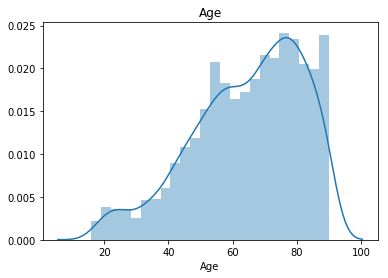

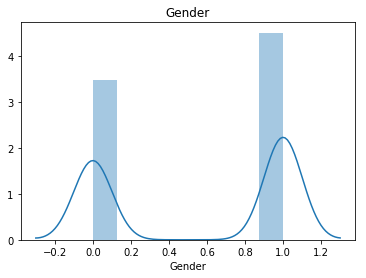

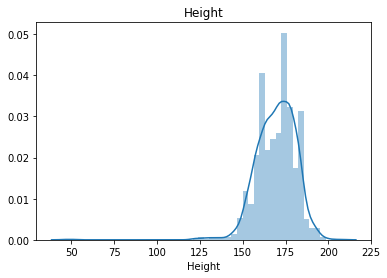

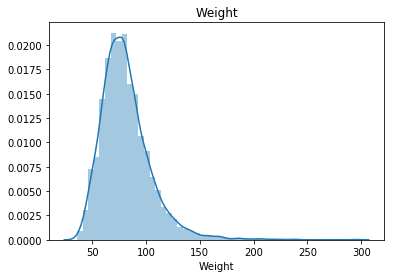

In [26]:
for element in df_static.columns:
    if element not in  ['RecordID','ICUType']:
        sns.distplot(df_static.loc[df_static[element].notnull(),element]).set_title(element)
        plt.show()

## static dataframe is now formatted & cleaned
## now we need to go back to the non-static dataframe:
* is the time column formatted as we want?
* are there missing values?
* is the value column in the proper format?
* are there erroneous values?
* is the distribution reasonable?

In [27]:
df.head()

,time,parameter,value,recordid
6,00:04,DiasABP,60,144404
7,00:04,GCS,11,144404
8,00:04,HR,85,144404
9,00:04,MAP,90,144404
10,00:04,NIDiasABP,68,144404


### concept lambda function:
* a easy way to implement a function in line without having to define it previously.
* common function define:    
  * def fxn1(arg1,arg2): 
  * return(arg1+arg2)
* lambda function:
  * lambda x,y: x+y

In [28]:
#quick formatting: need to make sure our value is infact recorded as a numerical (int, float, double, etc...) value. 
df['value'] = pd.to_numeric(df['value'], errors='raise')
df['time'] = df['time'].map(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1])) #converting the 00:00 time into minutes via txt parsing

df.head()

,time,parameter,value,recordid
6,4,DiasABP,60.0,144404
7,4,GCS,11.0,144404
8,4,HR,85.0,144404
9,4,MAP,90.0,144404
10,4,NIDiasABP,68.0,144404


In [29]:
df['parameter'].value_counts()

HR             228606
MAP            146458
SysABP         146259
DiasABP        146210
Urine          137123
Weight         125437
NISysABP        99420
NIDiasABP       99262
NIMAP           97883
Temp            84552
GCS             62566
RespRate        56359
FiO2            31591
MechVent        30215
pH              23825
PaCO2           22840
PaO2            22774
HCT             18439
K               14667
Platelets       14349
Creatinine      13959
BUN             13891
Mg              13725
Na              13721
HCO3            13612
Glucose         13154
WBC             13092
Lactate          8461
SaO2             7592
Bilirubin        3329
ALT              3302
AST              3301
ALP              3209
Albumin          2450
TroponinT        2169
TroponinI         376
Cholesterol       356
Name: parameter, dtype: int64

In [30]:

def replace_value(df, parameter, replacement, threshold=None, threshold2=None, operator=None):
    """returns a dataframe where the erroneous values specified by the keyword arguments are replaced or nullified. 

    Keyword arguments:
        df -- dataframe of longtiduinal values (dtype='dataframe', required)
        parameter  -- df parameter to replace erroneous values on (dtype='string', required)
        replacement -- value or modifier to replace specified erroneous values with (dtype='string', required)
        threshold -- value that the operator is applied to to be considered erroneous  (dtype=int, required)
        threshold2 -- only used for between.  (dtype=int, required)
        operator --  '>' or '<', considered by the threshold to determine erroneous values (dtype='string', required)
    """ 
    filtered = df['parameter'] == parameter

    if operator =='<':
        filtered = filtered & (df['value'] < threshold)

    elif operator =='>':
        filtered = filtered & (df['value'] > threshold)

    elif operator =='between':
        filtered = filtered & (df['value'] > threshold) & (df['value'] < threshold2)
        
    else:
        filtered = filtered & (df['value'] == threshold)


    if 'function' in str(type(replacement)):
        # value replacement is a function of the input
        df.loc[filtered, 'value'] = df.loc[filtered, 'value'].apply(replacement)
    else:
        df.loc[filtered, 'value'] = replacement
        
    return df

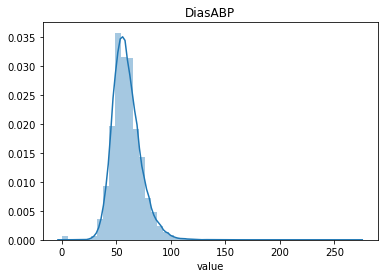

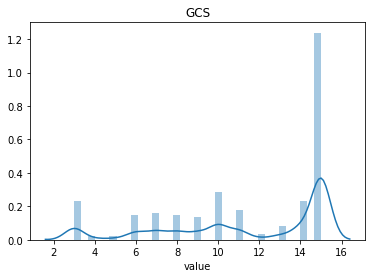

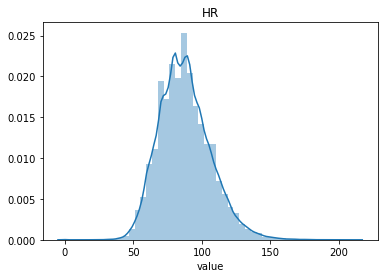

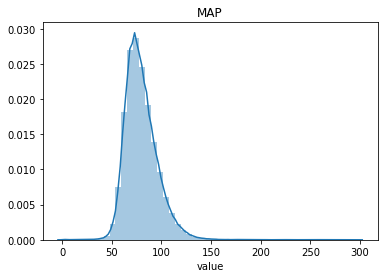

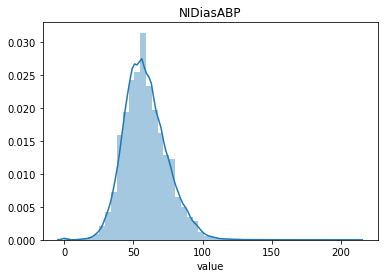

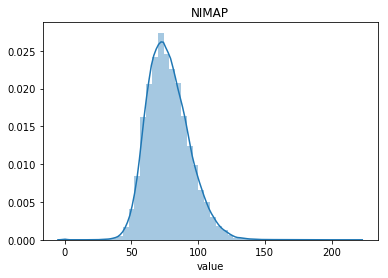

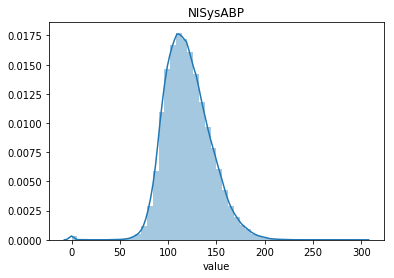

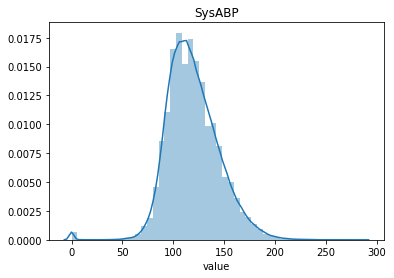

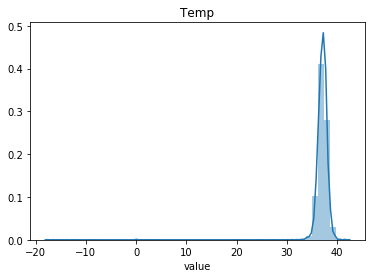

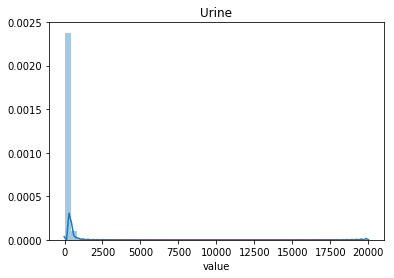

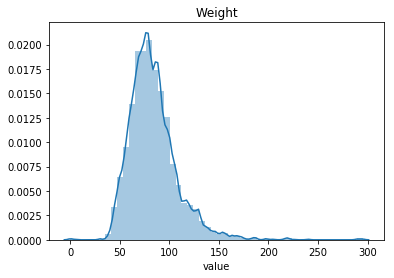

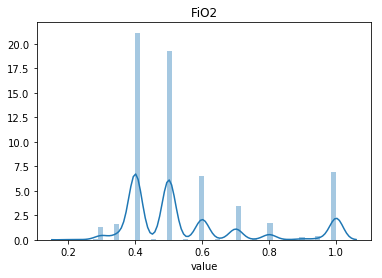

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


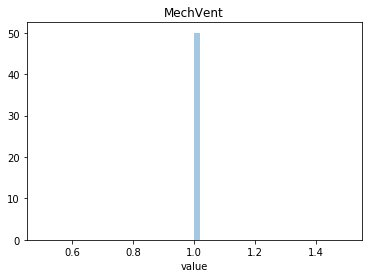

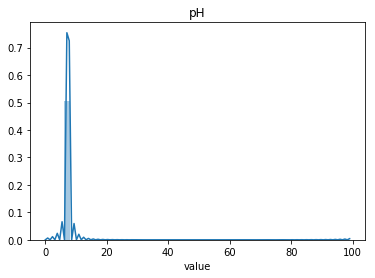

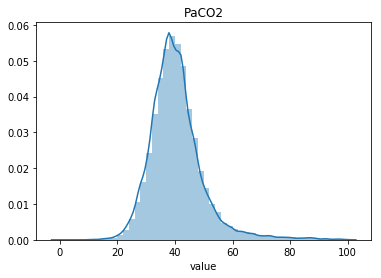

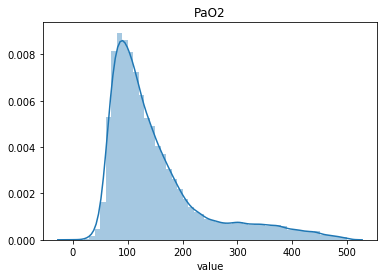

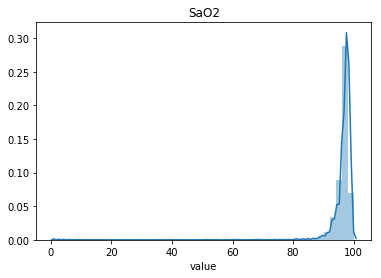

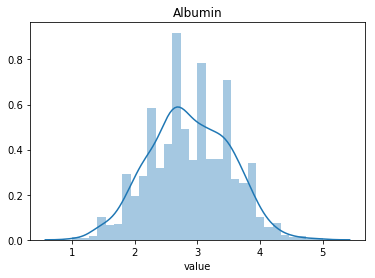

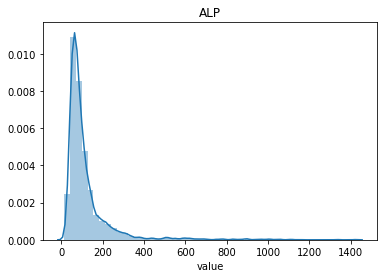

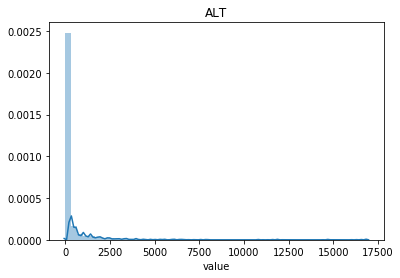

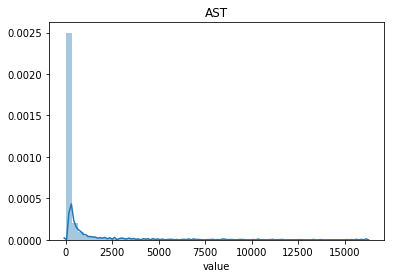

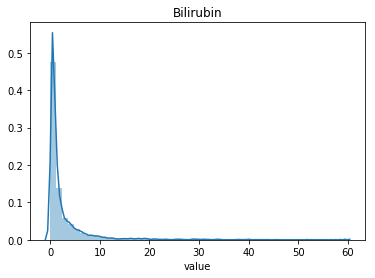

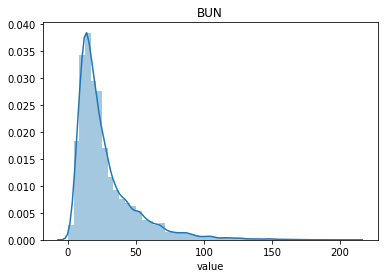

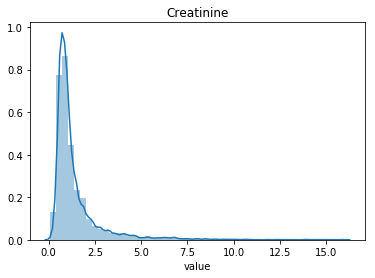

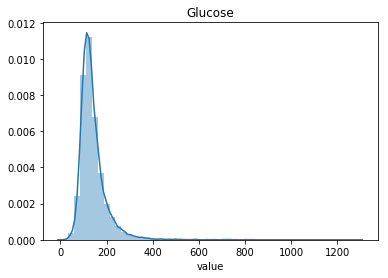

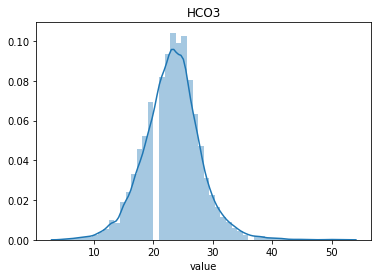

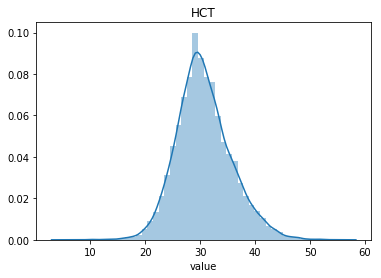

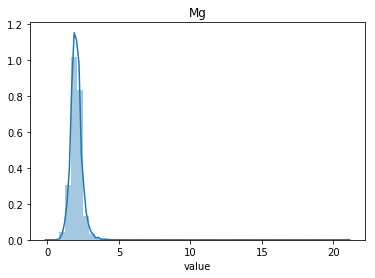

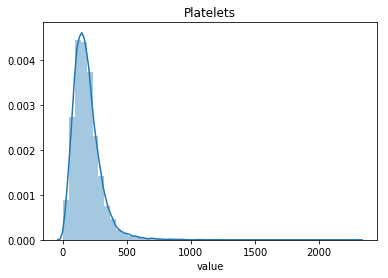

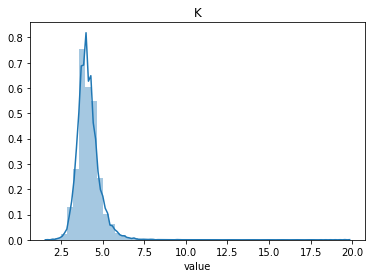

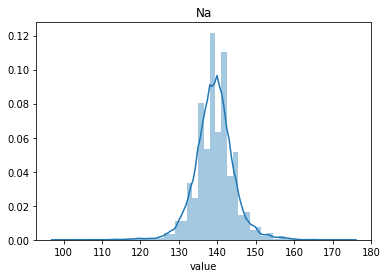

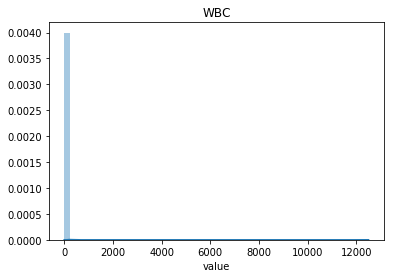

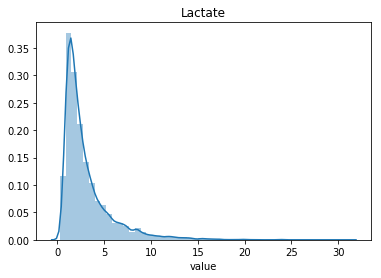

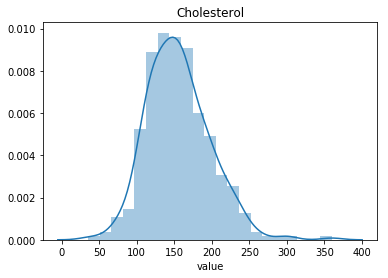

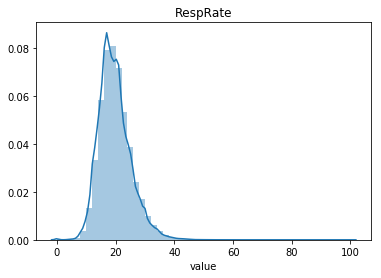

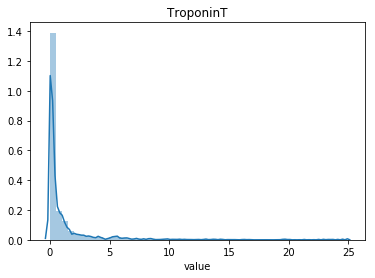

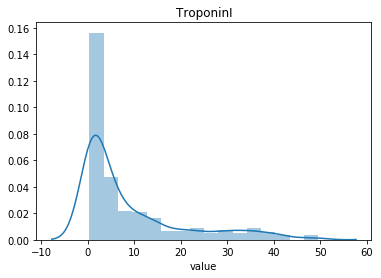

In [31]:
for element in df['parameter'].unique():
    if element not in  ['RecordID','ICUType']:
        sns.distplot(df.loc[(df['parameter'].notnull()) & (df['parameter']==element),'value']).set_title(element)
        plt.show()

In [32]:
for element in df['parameter'].unique():
    print(element)
    print(df.loc[df['parameter']==element,'value'].describe())

DiasABP
count    146210.000000
mean         59.273996
std          13.355256
min           0.000000
25%          51.000000
50%          58.000000
75%          67.000000
max         272.000000
Name: value, dtype: float64
GCS
count    62566.000000
mean        11.441694
std          4.009528
min          3.000000
25%          8.000000
50%         14.000000
75%         15.000000
max         15.000000
Name: value, dtype: float64
HR
count    228606.000000
mean         87.537701
std          18.721980
min           0.000000
25%          74.000000
50%          86.000000
75%          99.000000
max         212.000000
Name: value, dtype: float64
MAP
count    146458.000000
mean         79.776099
std          17.141433
min           0.000000
25%          69.000000
50%          77.000000
75%          89.000000
max         298.000000
Name: value, dtype: float64
NIDiasABP
count    99262.000000
mean        58.716760
std         15.501131
min          0.000000
25%         48.000000
50%         57.000000

In [33]:
### lots of value cleanup
df = replace_value(df, parameter='DiasABP', replacement=np.nan, threshold=-1)
df = replace_value(df, parameter='DiasABP', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'DiasABP', replacement=np.nan, threshold=200, operator='>')

df = replace_value(df, 'SysABP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'MAP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'NIDiasABP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'NISysABP',replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'NIMAP', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'HR', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'HR', replacement=np.nan, threshold=299, operator='>')

df = replace_value(df, 'PaCO2', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'PaCO2', replacement=lambda x: x*10, threshold=10, operator='<')

df = replace_value(df, 'PaO2', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'PaO2', replacement=lambda x: x*10, threshold=20, operator='<')

# the order of these steps matters
df = replace_value(df, 'pH', replacement=lambda x: x*10, threshold=0.65, threshold2=0.8, operator='between')
df = replace_value(df, 'pH', replacement=lambda x: x*0.1, threshold=65, threshold2=80, operator='between')
df = replace_value(df, 'pH', replacement=lambda x: x*0.01, threshold=650, threshold2=800, operator='between')
df = replace_value(df, 'pH', replacement=np.nan, threshold=6.5, operator='<')
df = replace_value(df, 'pH', replacement=np.nan, threshold=8, operator='>')

# convert to farenheit
df = replace_value(df, 'Temp', replacement=lambda x: x*9/5+32, threshold=1, threshold2=10, operator='between')
df = replace_value(df, 'Temp', replacement=lambda x: (x-32)*5/9, threshold=95, threshold2=113, operator='between')

df = replace_value(df, 'Temp', replacement=np.nan, threshold=25, operator='<')
df = replace_value(df, 'Temp', replacement=np.nan, threshold=45, operator='>')

df = replace_value(df, 'RespRate', replacement=np.nan, threshold=1, operator='<')

df = replace_value(df, 'WBC', replacement=np.nan, threshold=1, operator='<')
df = replace_value(df, 'WBC', replacement=np.nan, threshold=60, operator='>')

df = replace_value(df, 'Urine', replacement=lambda x: x/100, threshold=1000, operator='>')

df = replace_value(df, 'ALP', replacement=lambda x: x/10, threshold=500, operator='>')

df = replace_value(df, 'ALT', replacement=lambda x: x/100, threshold=200, operator='>')

df = replace_value(df, 'AST', replacement=lambda x: x/100, threshold=200, operator='>')


df = replace_value(df, 'Glucose', replacement=np.nan, threshold=1000, operator='>')


df = replace_value(df, 'Weight', replacement=np.nan,threshold=35, operator='<')
df = replace_value(df, 'Weight', replacement=np.nan, threshold=299, operator='>')

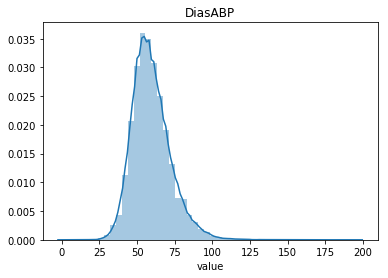

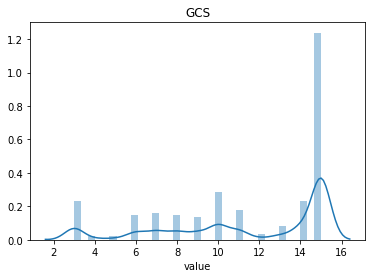

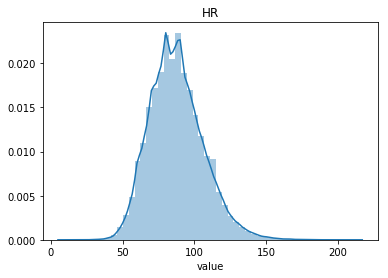

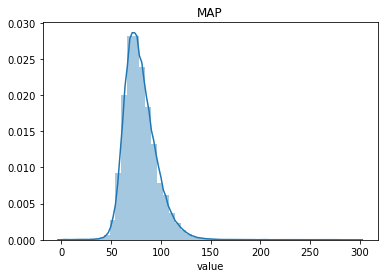

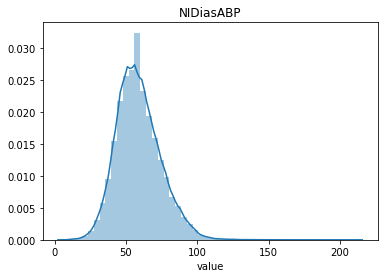

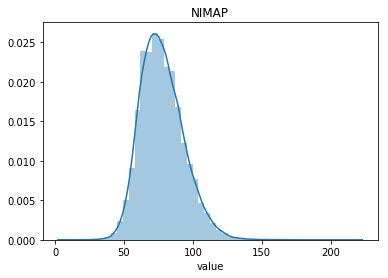

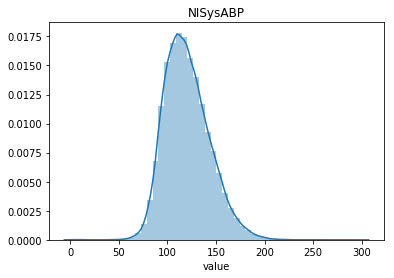

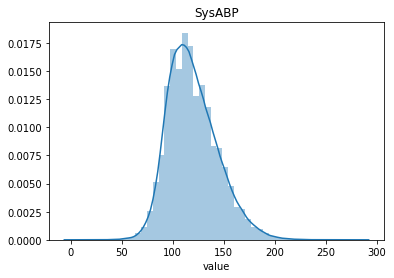

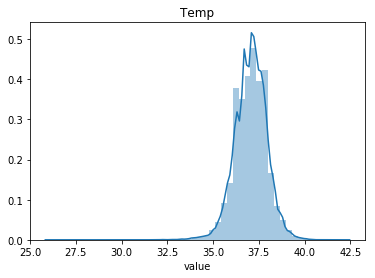

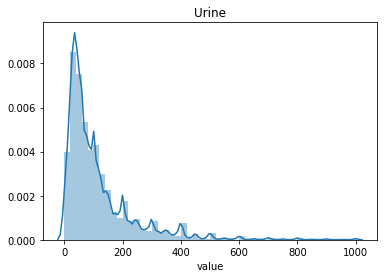

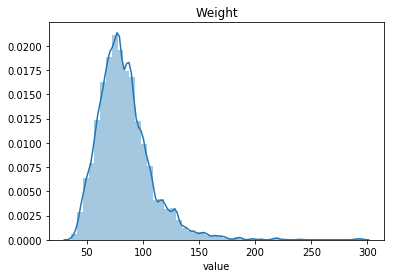

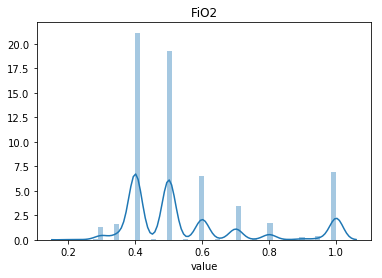

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


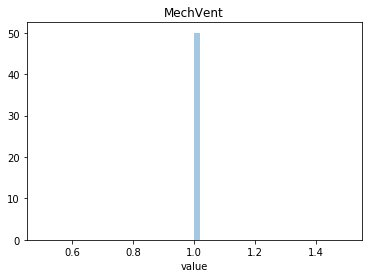

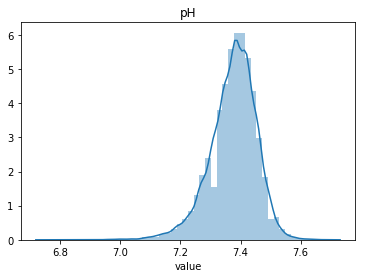

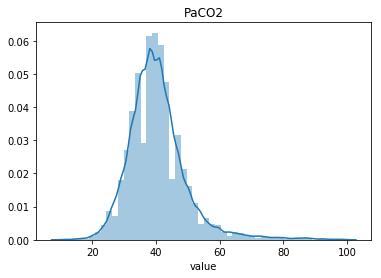

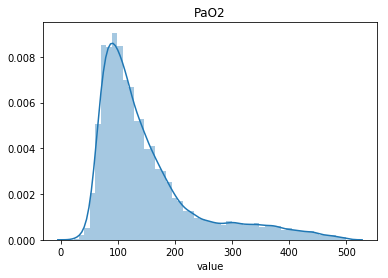

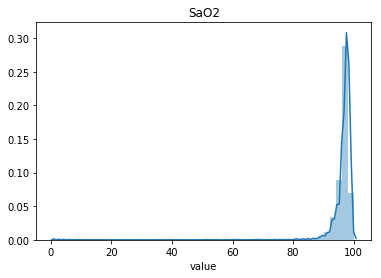

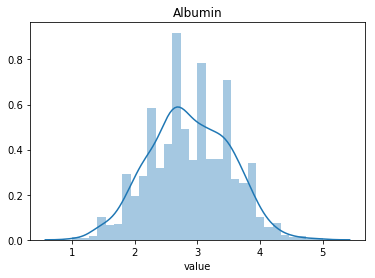

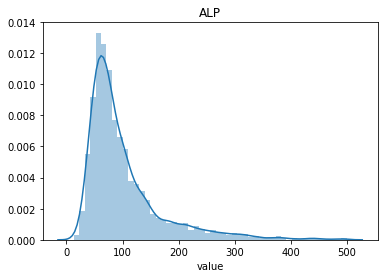

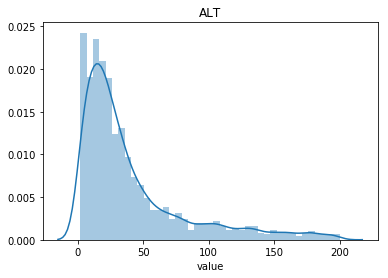

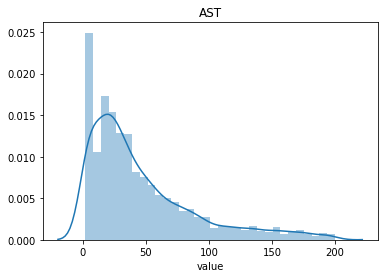

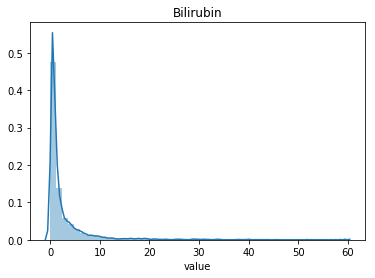

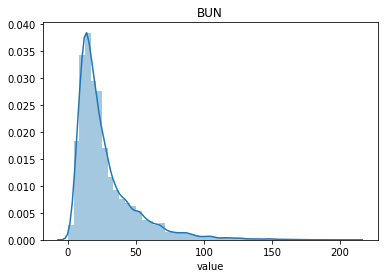

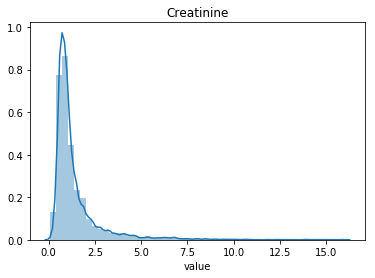

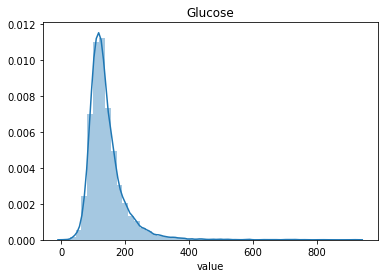

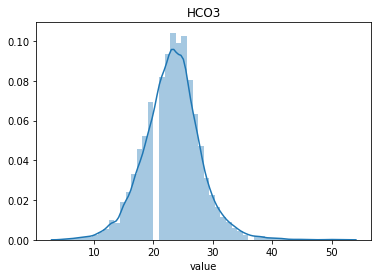

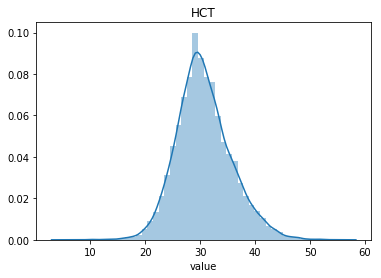

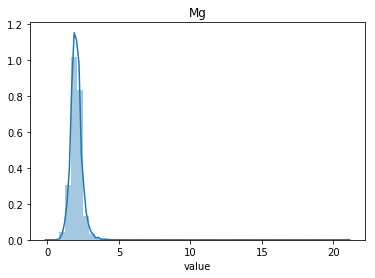

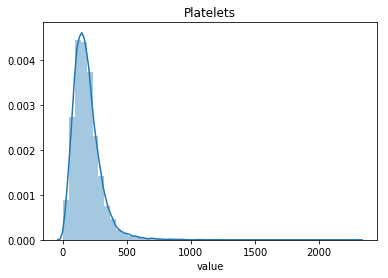

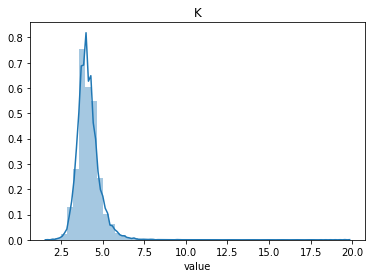

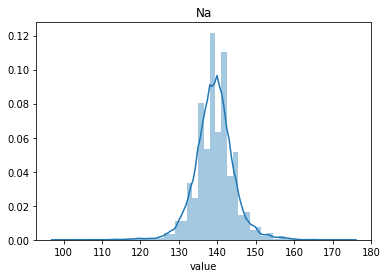

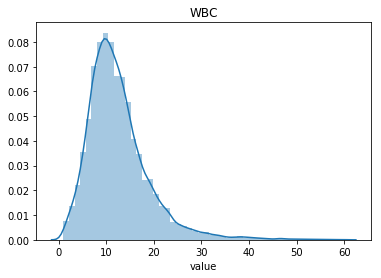

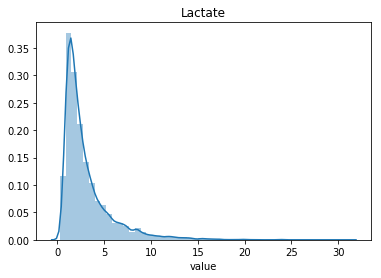

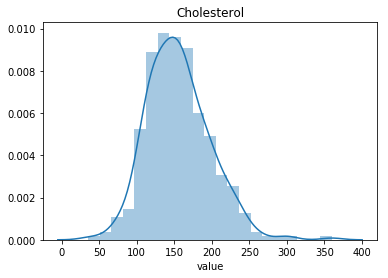

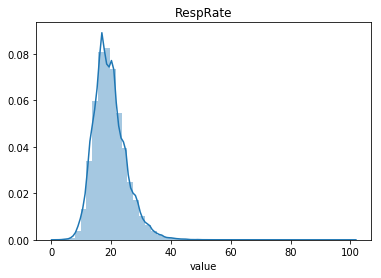

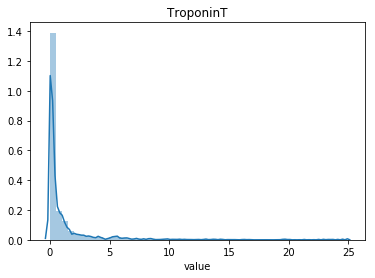

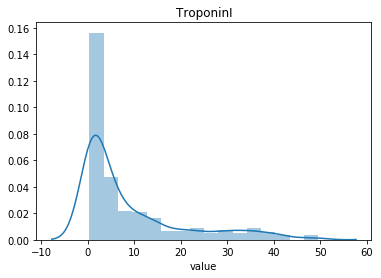

In [34]:
for element in df['parameter'].unique():
    sns.distplot(df.loc[(df['value'].notnull()) & (df['parameter']==element),'value']).set_title(element)
    plt.show()

In [35]:
for element in df['parameter'].unique():
    print(element)
    print(df.loc[df['parameter']==element,'value'].describe())

DiasABP
count    145660.000000
mean         59.487581
std          12.821004
min           1.000000
25%          51.000000
50%          58.000000
75%          67.000000
max         196.000000
Name: value, dtype: float64
GCS
count    62566.000000
mean        11.441694
std          4.009528
min          3.000000
25%          8.000000
50%         14.000000
75%         15.000000
max         15.000000
Name: value, dtype: float64
HR
count    228585.000000
mean         87.545743
std          18.704029
min          10.000000
25%          74.000000
50%          86.000000
75%          99.000000
max         212.000000
Name: value, dtype: float64
MAP
count    146424.000000
mean         79.794623
std          17.100258
min           1.000000
25%          69.000000
50%          77.000000
75%          89.000000
max         298.000000
Name: value, dtype: float64
NIDiasABP
count    99170.000000
mean        58.771231
std         15.404759
min          7.000000
25%         48.000000
50%         57.000000

## Create a design matrix X.

In [36]:
# Initialize a dataframe with df_static
X = df_static.copy()

X.drop('RecordID', axis=1, inplace=True)

In [37]:
# MICU is ICUType==3, and is used as the reference category
X['CCU'] = (X['ICUType'] == 1).astype(int)
X['CSRU'] = (X['ICUType'] == 2).astype(int)
X['SICU'] = (X['ICUType'] == 4).astype(int)
X.drop('ICUType', axis=1, inplace=True)

# aggregations

In [40]:
def aggregate_and_pivot(df,aggregation='mean'):
    """returns a dataframe where the columns are each type of vital measurement, with 1 row for each hadm_id and the values are aggregated according to the specified aggregate function. 

    Keyword arguments:
    vitals_df -- the cleaned up vitals dataframe (dtype='dataframe', required)
    aggregation -- string specifying the desired aggregation function ('mean', 'max', 'std'). (dtype='str', default='mean')
    """
    
    pivot_df=pd.DataFrame()
    
    ###aggregating all values for each hadm_id and vitalid
    if aggregation=='mean':
        group_agg=df.groupby(['recordid','parameter'])['value'].mean()
        
    elif aggregation=='max':
        group_agg=df.groupby(['recordid','parameter'])['value'].max()
        
    elif aggregation=='std':
        group_agg=df.groupby(['recordid','parameter'])['value'].std()
    
    ### making a pivot table off aggregated groupby
    pivot_df=pd.pivot_table(pd.DataFrame(group_agg),
                            values='value',
                            index=['recordid'],
                            columns=['parameter']).reset_index()

    adjusted_cols=[x+'_{}'.format(aggregation) for x in list(pivot_df)]

    #renaming columns to have _max after them
    pivot_df.columns= adjusted_cols
    #renaming the hadm id back to how it was origionally
    pivot_df.rename(index=str, columns={'recordid_{}'.format(aggregation):'recordid'}, inplace=True)
    pivot_df.set_index('recordid', inplace=True)
    return(pivot_df)

### note: for a better model, it makes more clinical sense to use the aggregation(s) that make most sense for each column, rather than just mean/std. 

In [41]:
mean_df= aggregate_and_pivot(df,'mean')
mean_df.head()

,ALP_mean,ALT_mean,AST_mean,Albumin_mean,BUN_mean,Bilirubin_mean,Cholesterol_mean,Creatinine_mean,DiasABP_mean,FiO2_mean,...,RespRate_mean,SaO2_mean,SysABP_mean,Temp_mean,TroponinI_mean,TroponinT_mean,Urine_mean,WBC_mean,Weight_mean,pH_mean
recordid,,,,,,,,,,,,,,,,,,,,,
142675,23.0,99.500,33.3225,2.133333,15.571429,2.04,NaN,1.242857,57.838235,0.846154,...,NaN,96.727273,118.117647,36.622917,NaN,NaN,239.775962,6.760000,NaN,7.379500
142676,NaN,NaN,NaN,NaN,25.600000,NaN,NaN,0.460000,NaN,NaN,...,17.666667,NaN,NaN,36.550000,NaN,NaN,90.482143,18.750000,NaN,NaN
142680,77.0,48.500,27.5000,NaN,22.333333,0.70,NaN,0.733333,58.857143,0.605000,...,NaN,93.000000,109.642857,37.918182,NaN,NaN,173.793103,14.966667,79.263043,7.401429
142683,44.0,87.965,102.6650,2.300000,14.666667,1.25,NaN,1.233333,57.965517,0.796154,...,NaN,92.666667,122.017241,37.253488,NaN,NaN,116.200000,20.487500,NaN,7.325000
142688,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,0.800000,58.956522,0.685714,...,19.162162,NaN,114.956522,37.733333,NaN,NaN,94.333333,14.250000,NaN,7.370000


In [42]:
std_df= aggregate_and_pivot(df,'std')
std_df.head()

,ALP_std,ALT_std,AST_std,Albumin_std,BUN_std,Bilirubin_std,Cholesterol_std,Creatinine_std,DiasABP_std,FiO2_std,...,RespRate_std,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std
recordid,,,,,,,,,,,,,,,,,,,,,
142675,3.391165,41.805103,48.484552,0.513160,5.126960,0.753658,NaN,0.525538,12.895227,0.240192,...,NaN,3.258555,21.826678,1.016234,NaN,NaN,115.334737,1.226739,NaN,0.067404
142676,NaN,NaN,NaN,NaN,9.607289,NaN,NaN,0.151658,NaN,NaN,...,4.012392,NaN,NaN,0.835029,NaN,NaN,91.638933,5.161880,NaN,NaN
142680,0.000000,6.363961,2.121320,NaN,1.154701,0.000000,NaN,0.057735,11.141448,0.153811,...,NaN,NaN,15.385343,1.025493,NaN,NaN,151.584813,2.433790,0.312238,0.070812
142683,7.071068,101.872874,117.853487,0.989949,4.041452,0.777817,NaN,0.288675,10.700001,0.171345,...,NaN,3.141125,19.276830,0.349386,NaN,NaN,138.287678,2.579832,NaN,0.073249
142688,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.141421,5.439571,0.167616,...,3.515944,NaN,9.202165,0.572607,NaN,NaN,51.557356,2.474874,NaN,NaN


In [43]:
#merging the static data with mean and std aggregations
X= pd.merge(X, mean_df, left_index=True, right_index=True)
X= pd.merge(X, std_df, left_index=True, right_index=True)

In [44]:
X.head()

,Age,Gender,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,AST_mean,...,RespRate_std,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std
recordid,,,,,,,,,,,,,,,,,,,,,
142675,70.0,1.0,175.3,85.0,0,1,0,23.0,99.500,33.3225,...,NaN,3.258555,21.826678,1.016234,NaN,NaN,115.334737,1.226739,NaN,0.067404
142676,57.0,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,...,4.012392,NaN,NaN,0.835029,NaN,NaN,91.638933,5.161880,NaN,NaN
142680,60.0,1.0,182.9,78.8,0,0,0,77.0,48.500,27.5000,...,NaN,NaN,15.385343,1.025493,NaN,NaN,151.584813,2.433790,0.312238,0.070812
142683,64.0,1.0,180.3,145.2,0,1,0,44.0,87.965,102.6650,...,NaN,3.141125,19.276830,0.349386,NaN,NaN,138.287678,2.579832,NaN,0.073249
142688,51.0,1.0,172.7,90.0,0,0,1,NaN,NaN,NaN,...,3.515944,NaN,9.202165,0.572607,NaN,NaN,51.557356,2.474874,NaN,NaN


In [45]:
# load in outcomes
if dataset == 'set-a':
    y = pd.read_csv('Outcomes-a.txt')
elif dataset == 'set-b':
    y = pd.read_csv('Outcomes-b.txt')
    
y.set_index('RecordID', inplace=True)
y.index.name = 'recordid'

In [ ]:
# X = y.merge(X, how='inner', left_index=True, right_index=True)
# X.head()

In [52]:
for element in y.columns:
    print(element)
    print(y[element].value_counts())

SAPS-I
 16    298
 15    273
 14    267
 18    267
 12    255
 17    252
 13    226
 19    220
 11    215
 10    200
 20    193
 9     184
-1     162
 21    160
 8     131
 22    122
 7     104
 23     86
 6      76
 24     69
 5      62
 4      31
 25     31
 26     28
 27     20
 3      17
 28     15
 2      11
 29      9
 30      7
 33      3
 32      3
 1       2
 0       1
Name: SAPS-I, dtype: int64
SOFA
 8     354
 7     354
 1     324
 2     318
 6     311
 9     308
 5     305
 3     277
 4     265
 10    214
 11    187
 12    163
 0     141
-1     137
 13    127
 14     90
 15     55
 16     29
 17     17
 18      7
 22      6
 20      5
 19      3
 21      3
Name: SOFA, dtype: int64
Length_of_stay
 6      316
 5      296
 8      294
 7      277
 9      249
 4      226
 10     210
 11     201
 3      171
 12     155
 14     137
 13     126
 15     113
 17     102
 16      96
 19      78
 18      70
 20      62
 22      58
 25      55
-1       54
 2       54
 21      48
 27    

In [57]:
X = pd.merge(X,y['In-hospital_death'], how='inner', left_index=True, right_index=True)
X.head()

,Age,Gender,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,AST_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
recordid,,,,,,,,,,,,,,,,,,,,,
142675,70.0,1.0,175.3,85.0,0,1,0,23.0,99.500,33.3225,...,3.258555,21.826678,1.016234,NaN,NaN,115.334737,1.226739,NaN,0.067404,1
142676,57.0,0.0,NaN,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,0.835029,NaN,NaN,91.638933,5.161880,NaN,NaN,0
142680,60.0,1.0,182.9,78.8,0,0,0,77.0,48.500,27.5000,...,NaN,15.385343,1.025493,NaN,NaN,151.584813,2.433790,0.312238,0.070812,1
142683,64.0,1.0,180.3,145.2,0,1,0,44.0,87.965,102.6650,...,3.141125,19.276830,0.349386,NaN,NaN,138.287678,2.579832,NaN,0.073249,0
142688,51.0,1.0,172.7,90.0,0,0,1,NaN,NaN,NaN,...,NaN,9.202165,0.572607,NaN,NaN,51.557356,2.474874,NaN,NaN,0


In [69]:
X.reset_index(inplace=True)

# todo:
* train/test split
    * (optional) sample to reduce effect of class imballance
* standardize and scale values (encouraged)
* impute nans
* model
* evaluate

In [192]:
# 70/30 train/test set split with 12345=seed and ensuring even distibution of classes. 

from sklearn.model_selection import train_test_split
train, test = train_test_split(X, test_size=0.3, random_state=12345, 
                               stratify=X['In-hospital_death'])

In [193]:
train['In-hospital_death'].value_counts()

0    2397
1     397
Name: In-hospital_death, dtype: int64

In [194]:
test['In-hospital_death'].value_counts()

0    1028
1     170
Name: In-hospital_death, dtype: int64

# (optional): downsample training samples to adjust for class imballance
* since the readmission/non-readmission labels are imballanced, adjusting for this in the training set can help improve performance. 

In [183]:
# split the training data into positive and negative
rows_pos = train['In-hospital_death'] == 1
df_train_pos = train.loc[rows_pos,:]
df_train_neg = train.loc[~rows_pos,:]
# merge the balanced data
train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)
# shuffle the order of training samples 
train = train.sample(n = len(train), random_state = 42).reset_index(drop = True)

In [184]:
#qc

In [185]:
train.describe()

,recordid,Age,Gender,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
count,794.000000,794.000000,794.000000,401.000000,737.000000,794.000000,794.000000,794.000000,385.000000,394.000000,...,268.000000,574.000000,785.000000,30.000000,162.000000,775.000000,755.000000,531.000000,574.000000,794.000000
mean,147772.060453,66.095718,0.557935,168.667082,78.630896,0.138539,0.141058,0.277078,99.808302,38.305974,...,1.862937,17.158694,0.627091,3.502832,0.228382,88.562051,2.506819,0.634285,0.050538,0.500000
std,2909.800688,17.248818,0.496945,11.326196,22.122832,0.345683,0.348301,0.447837,59.854421,35.638447,...,3.195510,5.853223,0.270547,5.086946,0.785196,55.630543,2.090518,1.954998,0.029418,0.500315
min,142680.000000,16.000000,0.000000,124.500000,36.000000,0.000000,0.000000,0.000000,30.000000,2.435000,...,0.000000,2.629956,0.115820,0.070711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145304.500000,54.250000,0.000000,162.600000,63.800000,0.000000,0.000000,0.000000,62.000000,15.000000,...,0.702846,13.060973,0.436585,0.542981,0.007803,46.564129,1.051783,0.000000,0.029537,0.000000
50%,147902.000000,69.000000,1.000000,170.200000,75.600000,0.000000,0.000000,0.000000,81.000000,27.000000,...,1.016398,16.379343,0.585540,1.425358,0.042030,77.708663,1.985783,0.000000,0.045548,0.500000
75%,150230.750000,80.000000,1.000000,177.800000,89.400000,0.000000,0.000000,1.000000,116.000000,47.750000,...,1.926793,20.407935,0.760263,3.904929,0.141472,122.502186,3.334137,0.097068,0.064595,1.000000
max,152864.000000,90.000000,1.000000,193.000000,205.000000,1.000000,1.000000,1.000000,370.000000,196.000000,...,30.405592,39.303915,1.946860,21.433385,8.502513,390.828180,19.300777,23.626372,0.205020,1.000000


In [186]:
train.head()

,recordid,Age,Gender,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,...,SaO2_std,SysABP_std,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,In-hospital_death
0,152134,64.0,0.0,152.4,58.4,0,1,0,86.00,50.00,...,0.744024,11.353694,0.358498,NaN,NaN,117.866189,2.687006,0.000000,0.058430,0
1,147863,49.0,0.0,154.9,51.0,0,1,0,NaN,NaN,...,1.516575,22.395709,0.342089,NaN,NaN,145.267306,2.121320,4.026726,0.043627,0
2,152640,47.0,0.0,149.9,79.4,0,0,0,104.00,30.00,...,13.426342,14.855307,0.977241,NaN,NaN,129.950434,6.546577,0.000000,0.064638,1
3,152487,55.0,1.0,NaN,137.0,0,0,0,73.75,62.25,...,NaN,13.038001,0.397520,NaN,NaN,31.915248,8.163486,0.000000,NaN,0
4,146329,82.0,1.0,NaN,75.1,0,0,0,56.00,10.50,...,NaN,NaN,0.823352,NaN,NaN,124.801060,NaN,0.000000,0.010000,1


# scaling/normalization (optional)
* some modeling algorithms (not all) benefit from log scaling values and/ or converting them to unit variances (ie z_scores) with mean=0 and sd=1. 
* this is partily because these monotonic transformations help adjust for skewed distributions

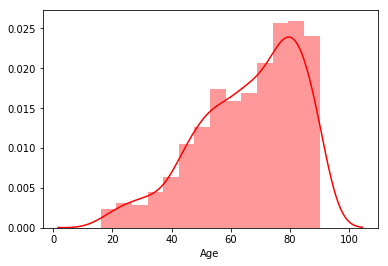

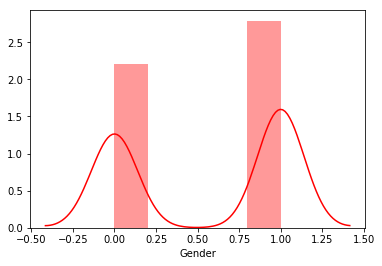

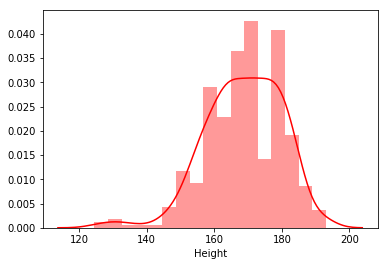

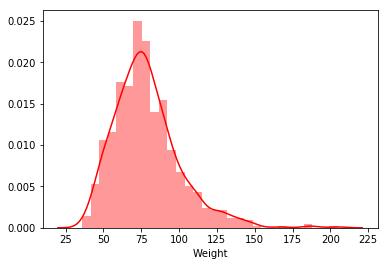

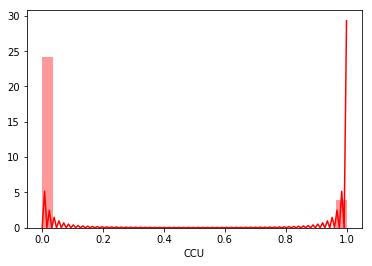

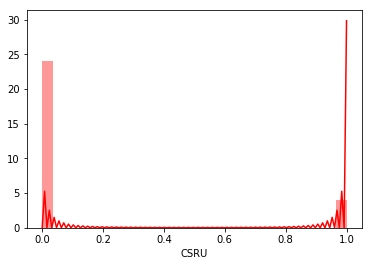

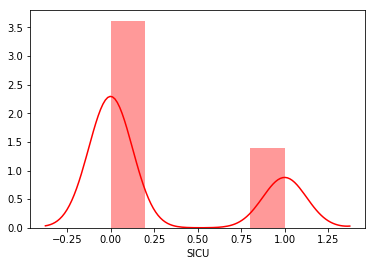

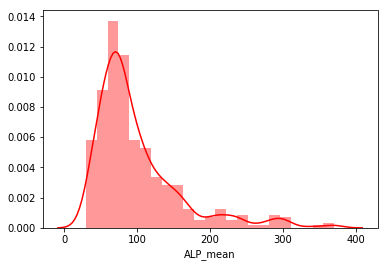

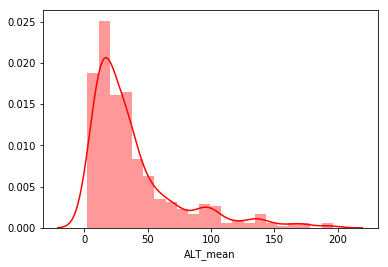

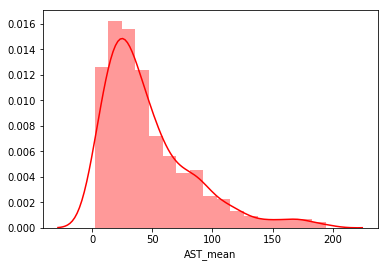

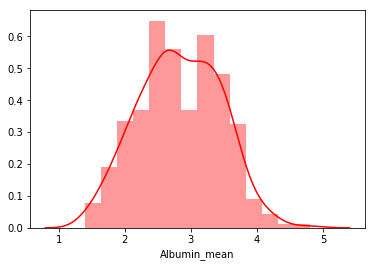

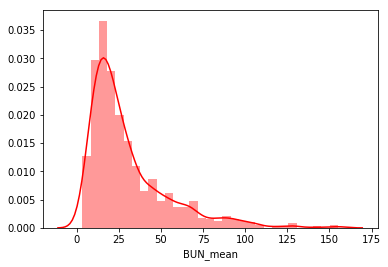

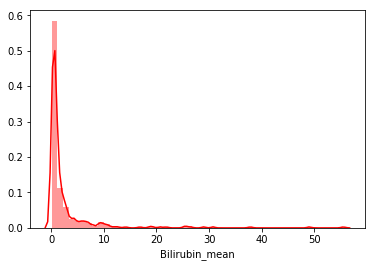

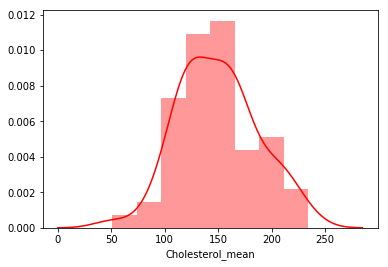

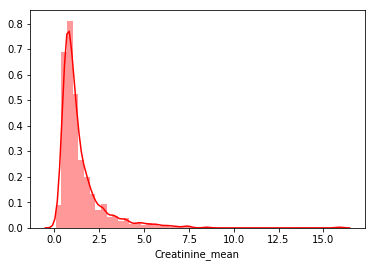

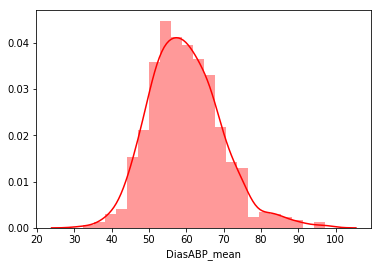

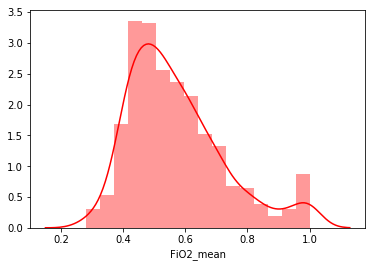

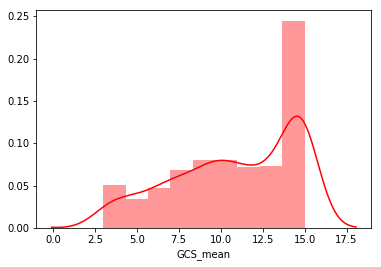

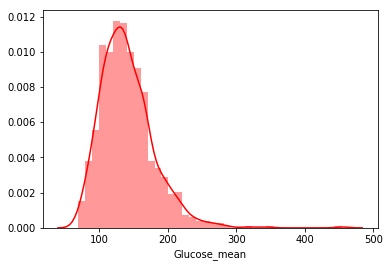

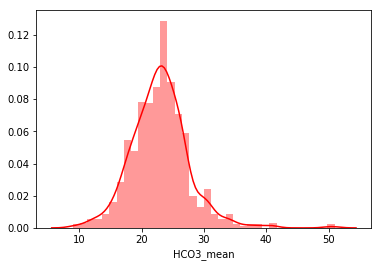

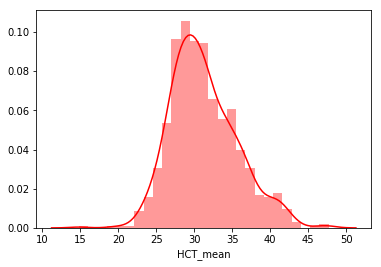

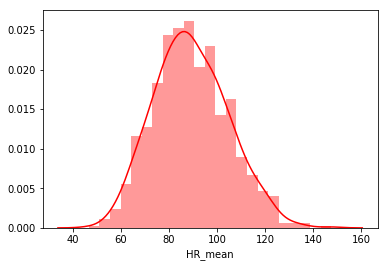

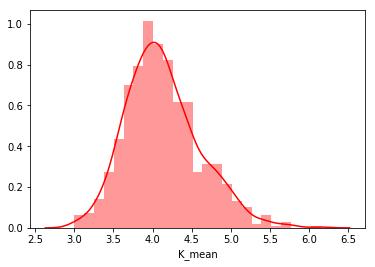

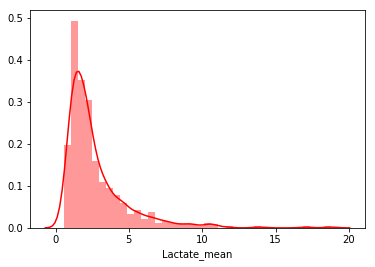

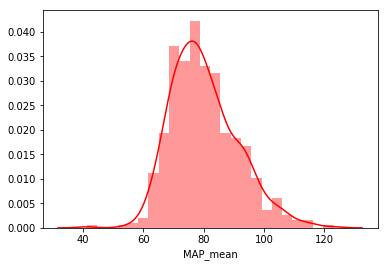

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


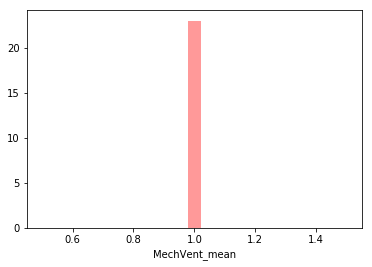

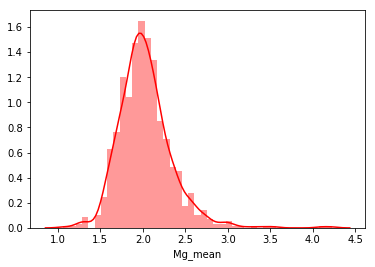

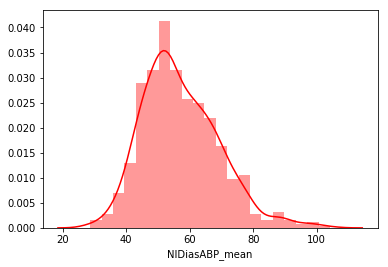

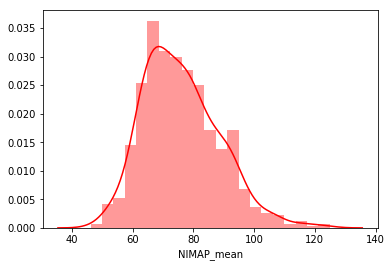

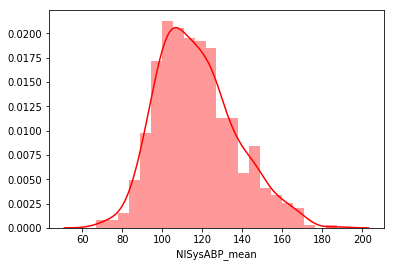

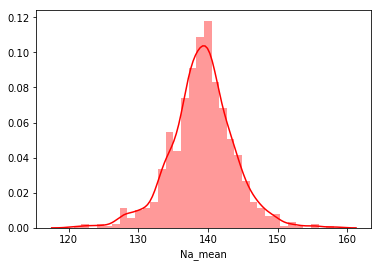

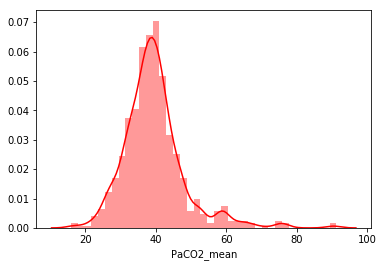

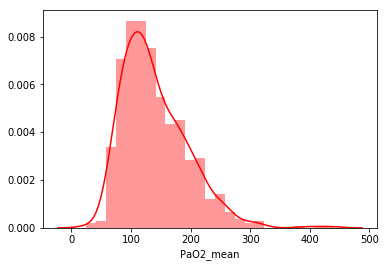

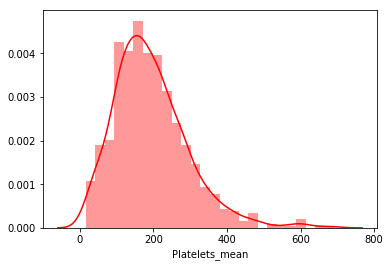

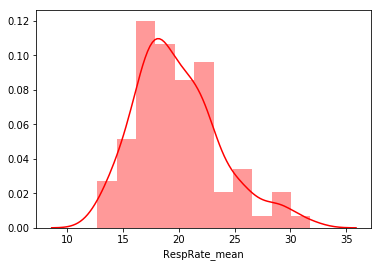

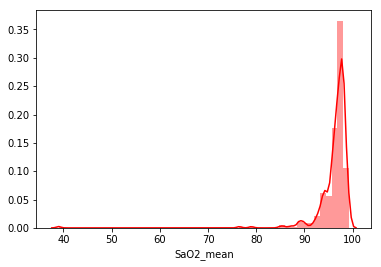

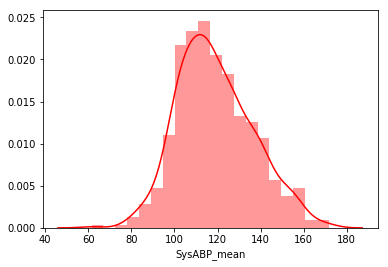

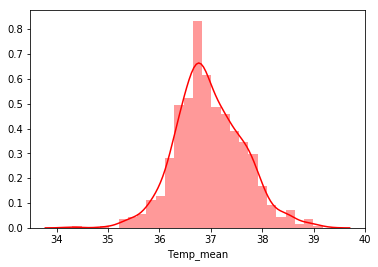

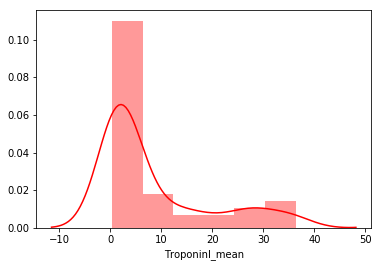

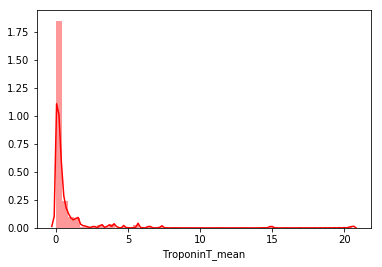

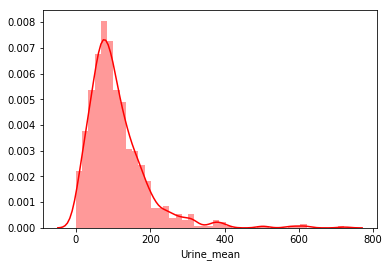

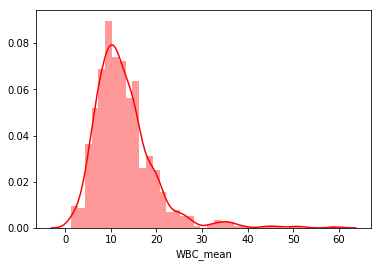

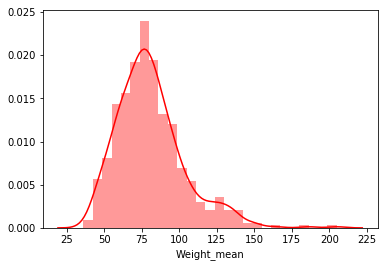

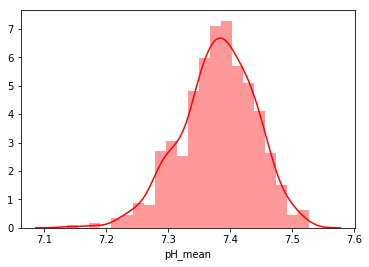

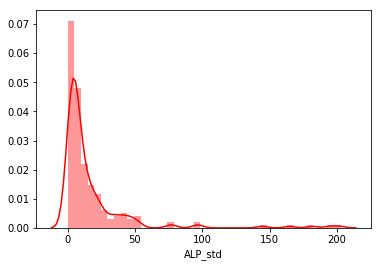

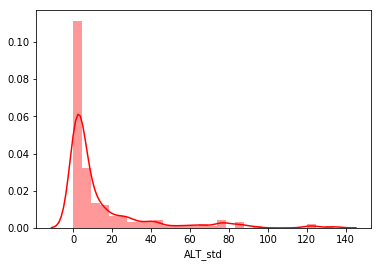

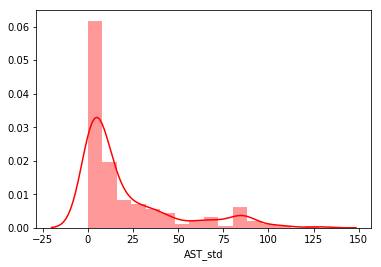

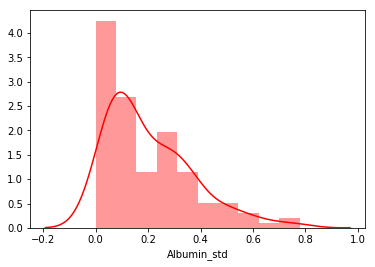

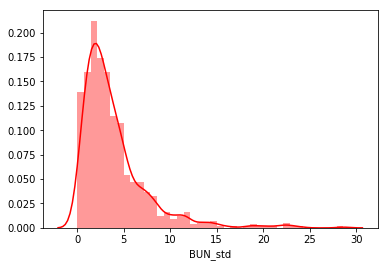

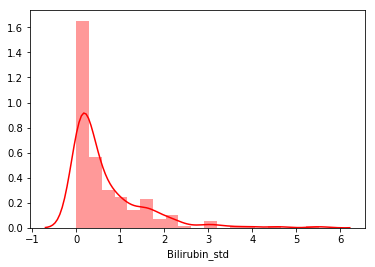

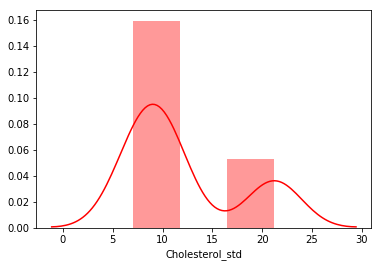

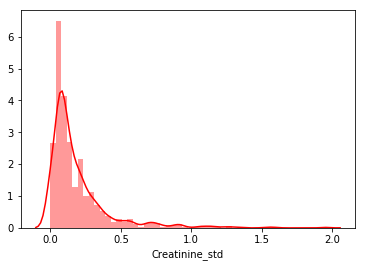

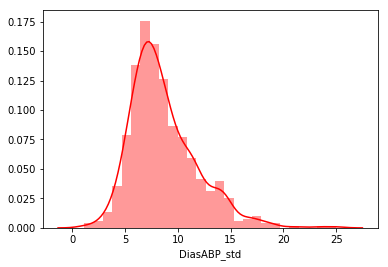

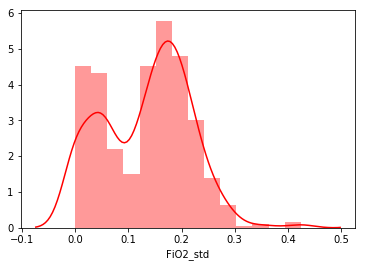

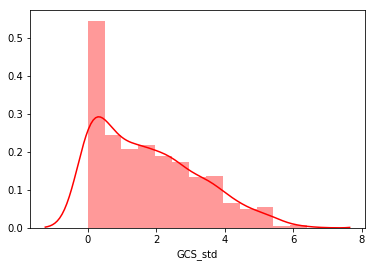

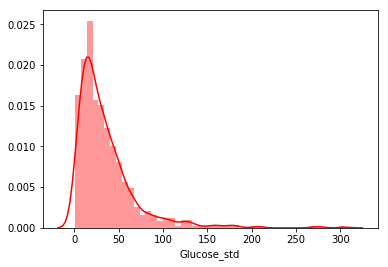

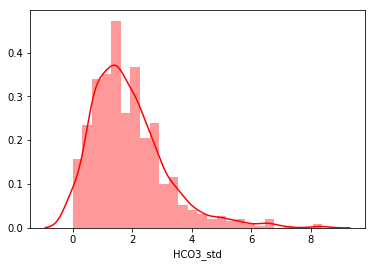

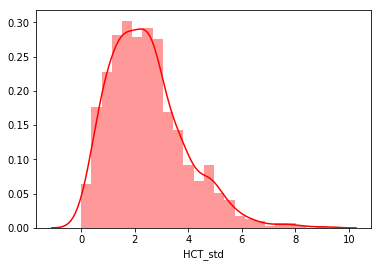

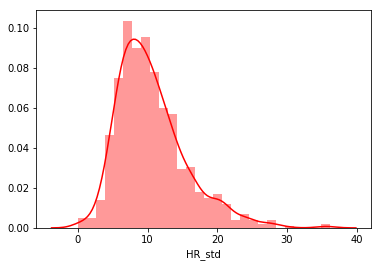

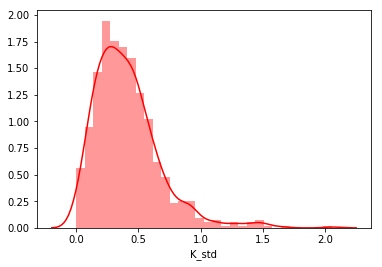

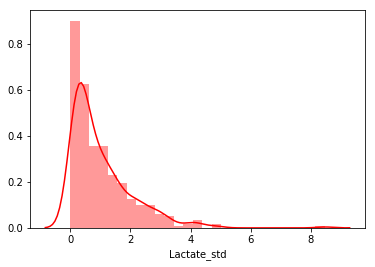

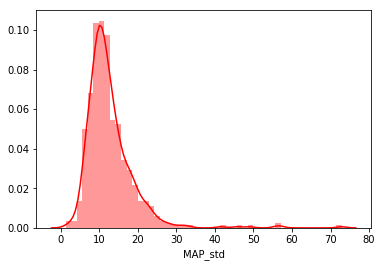

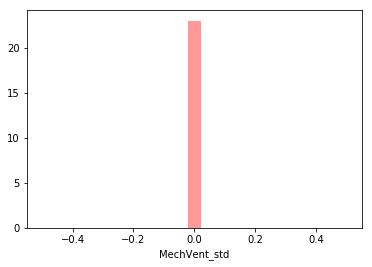

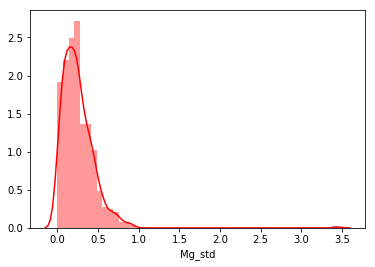

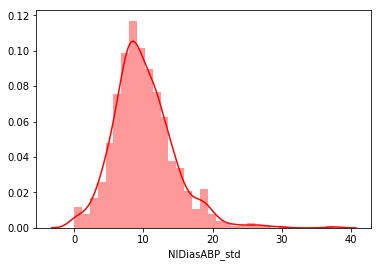

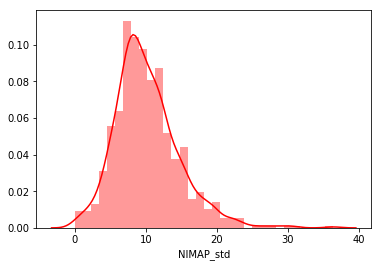

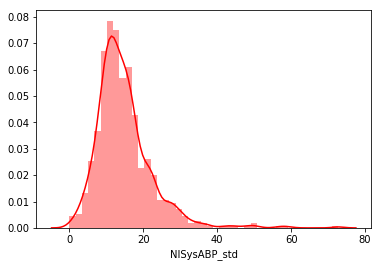

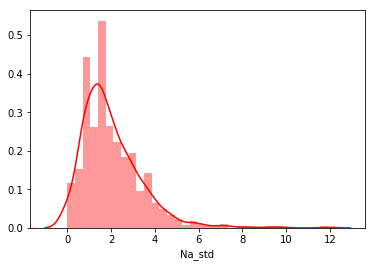

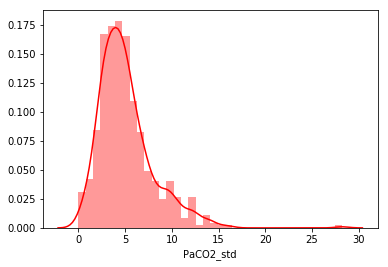

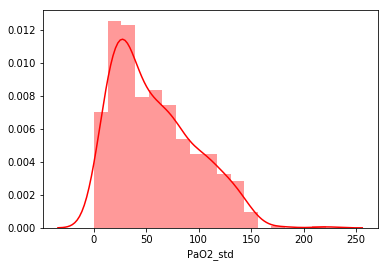

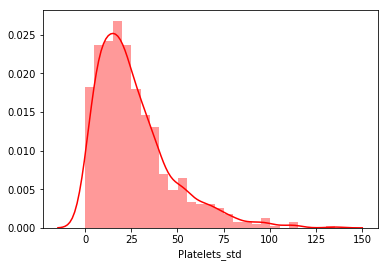

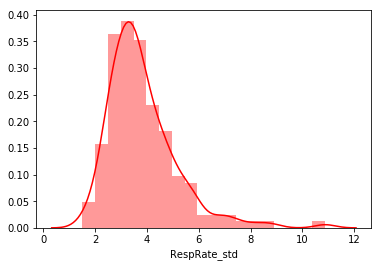

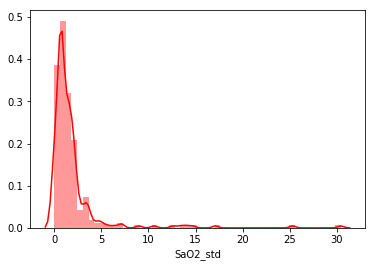

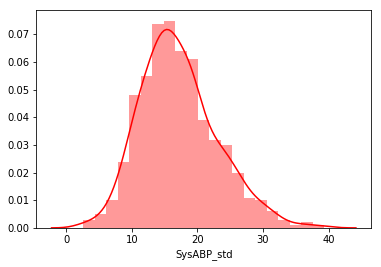

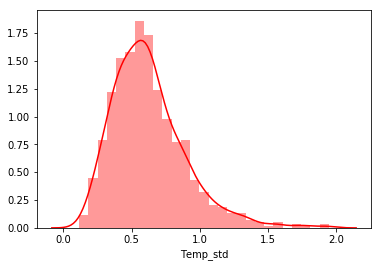

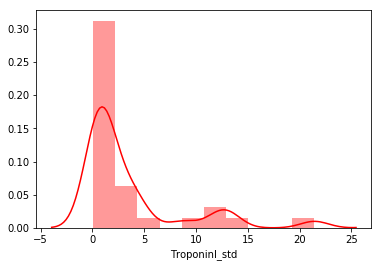

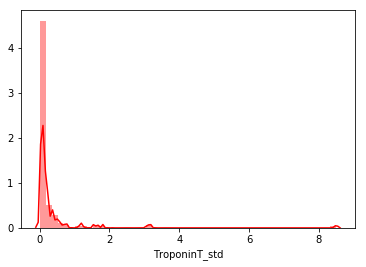

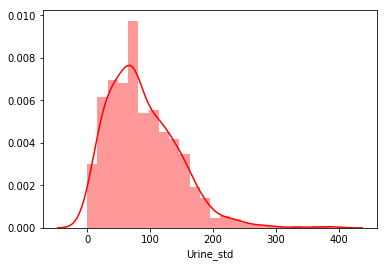

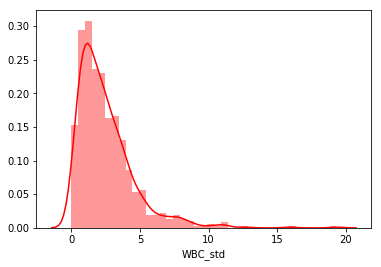

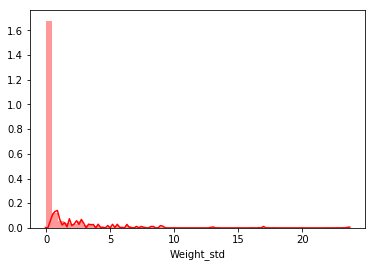

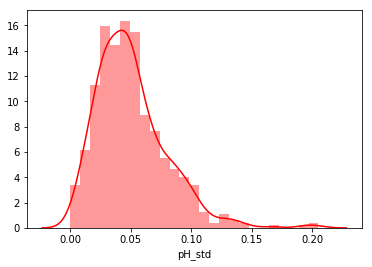

In [106]:
# # lets first look at the distribution of all of our variables
# for element in [x for x in list(train) if x not in ['In-hospital_death','recordid']]:
#     p1=sns.distplot(train.loc[train[element].notnull(),element], color="r",label="{}".format(element))#shade=True,
#     plt.show()
# # p1=sns.kdeplot(train['DiasBP_mean'], shade=True, color="r")
# # plt.show()

In [ ]:
# train_dns= train.pop(do_not_scale)
# test_dns= train.pop(do_not_scale)

In [187]:
##log scaling then converting to unit variance with mean 0 and std = 1

from sklearn.preprocessing import PowerTransformer, StandardScaler
scaler = StandardScaler()

do_not_scale=['recordid', 'Gender', 'In-hospital_death']
scale= [x for x in list(train) if x not in do_not_scale]

train_s= scaler.fit_transform(np.log(train[scale]+1))
test_s= scaler.fit_transform(np.log(test[scale]+1))

train_s= pd.DataFrame(train_s, columns= scale)
test_s= pd.DataFrame(train_s, columns= scale)
       
train_s[[x for x in list(do_not_scale)]]=train[[x for x in list(do_not_scale)]]
test_s[[x for x in list(do_not_scale)]]=test[[x for x in list(do_not_scale)]]

train= train_s.copy()
test= test_s.copy()
del train_s, test_s

In [149]:
train

,Age,Height,Weight,CCU,CSRU,SICU,ALP_mean,ALT_mean,AST_mean,Albumin_mean,...,Temp_std,TroponinI_std,TroponinT_std,Urine_std,WBC_std,Weight_std,pH_std,recordid,Gender,In-hospital_death
0,NaN,NaN,NaN,-0.401022,-0.405244,1.615268,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.065554,-0.110739,-0.567378,NaN,148238,1.0,0
1,-0.024042,NaN,NaN,2.493628,-0.405244,-0.619092,NaN,NaN,NaN,0.449187,...,-0.218339,NaN,1.914968,0.403579,0.780645,-0.567378,NaN,148958,0.0,0
2,0.815731,NaN,0.015869,-0.401022,-0.405244,-0.619092,0.630412,0.718068,0.811027,-0.488169,...,0.915477,NaN,2.088628,0.660081,0.569257,NaN,1.166322,148727,1.0,1
3,NaN,NaN,0.693878,-0.401022,-0.405244,1.615268,-1.757217,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.754441,-0.567378,NaN,145363,0.0,0
4,0.666195,NaN,-0.472787,-0.401022,-0.405244,1.615268,NaN,NaN,NaN,0.449187,...,0.462359,NaN,NaN,0.462123,0.972276,NaN,-0.838894,142777,0.0,1
5,NaN,NaN,NaN,-0.401022,-0.405244,1.615268,NaN,NaN,NaN,0.759647,...,NaN,NaN,NaN,0.267281,0.426002,-0.567378,NaN,152604,0.0,0
6,-0.292766,NaN,0.947829,-0.401022,-0.405244,-0.619092,NaN,NaN,NaN,0.661047,...,NaN,NaN,NaN,NaN,0.514671,-0.567378,-0.204652,142710,0.0,1
7,0.637029,NaN,-1.013522,-0.401022,-0.405244,1.615268,NaN,NaN,NaN,NaN,...,-1.359872,NaN,-1.487438,NaN,-0.780021,NaN,-0.067127,145093,0.0,0
8,NaN,0.307111,-0.159477,2.493628,-0.405244,-0.619092,-0.199368,0.094347,0.916677,0.531474,...,0.885380,NaN,1.349473,0.825337,0.510659,-0.567378,0.569455,142863,1.0,0
9,NaN,NaN,0.131436,-0.401022,-0.405244,-0.619092,NaN,NaN,NaN,NaN,...,0.565340,NaN,NaN,0.864256,0.540592,-0.567378,NaN,147359,1.0,0


# constructing vectors and matricies for models

In [206]:
#train
train_hadm_id= train.pop('recordid')
train['In-hospital_death'] =pd.to_numeric(train['In-hospital_death'])
y= np.array(train.pop('In-hospital_death'))
x= np.array(train)

#test
test_hadm_id= test.pop('recordid')
test['In-hospital_death'] =pd.to_numeric(test['In-hospital_death'])
y_test= np.array(test.pop('In-hospital_death'))
x_test= np.array(test)

/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


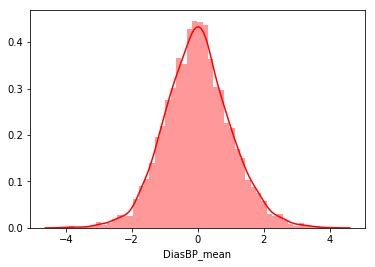

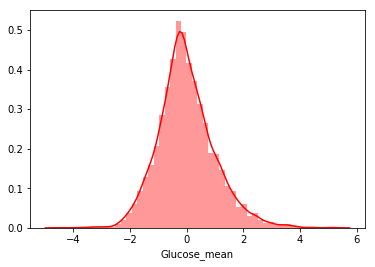

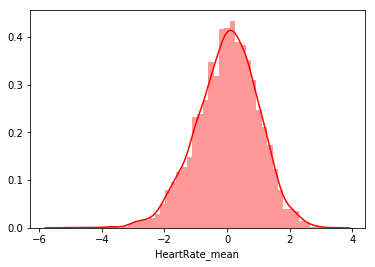

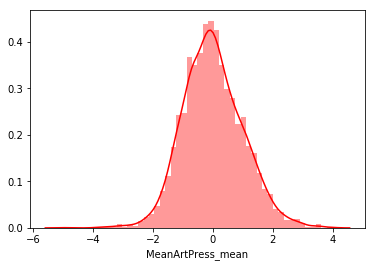

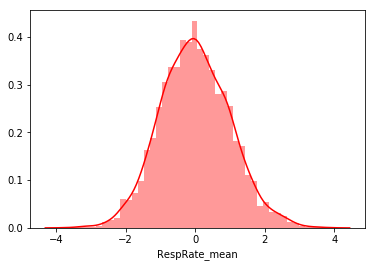

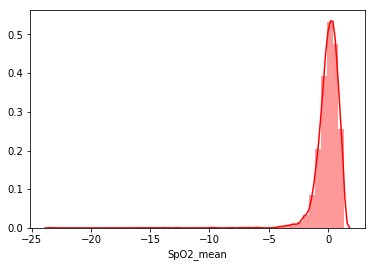

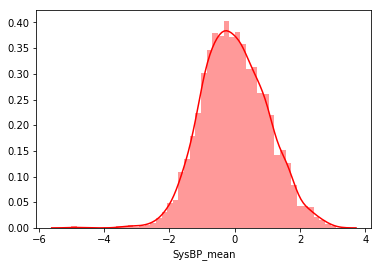

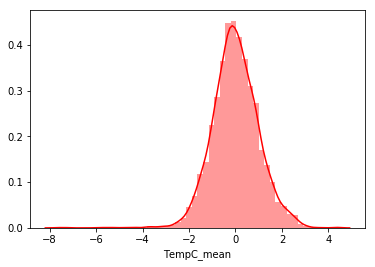

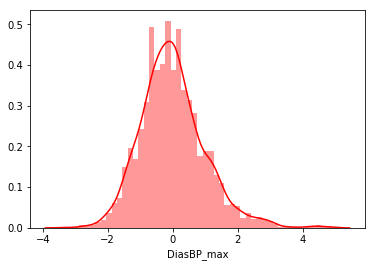

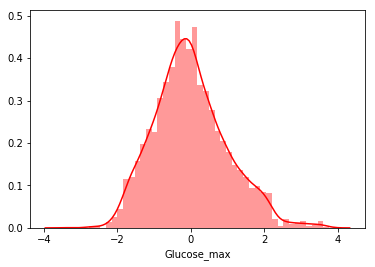

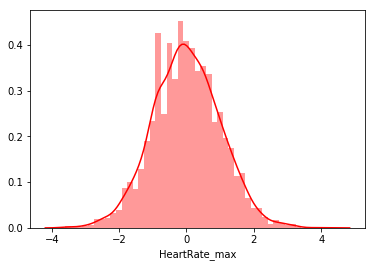

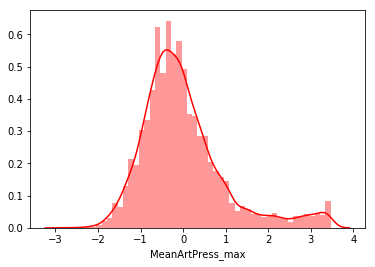

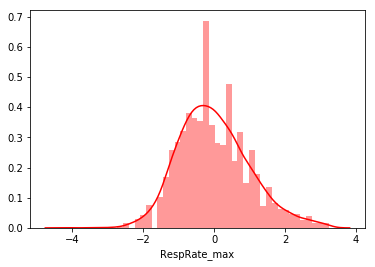

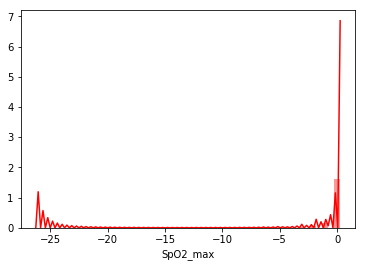

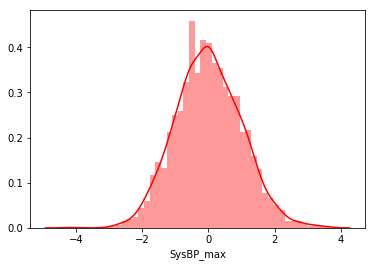

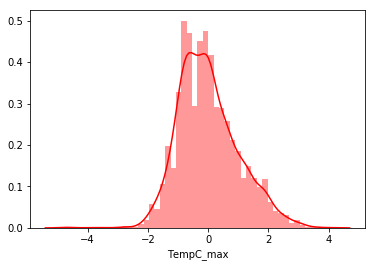

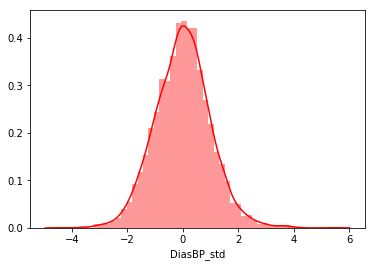

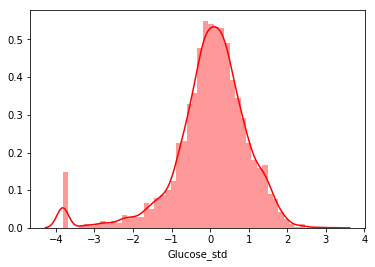

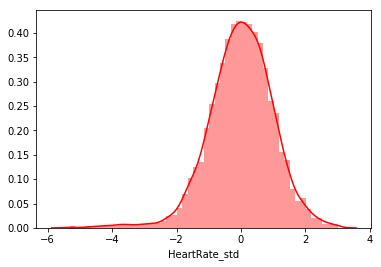

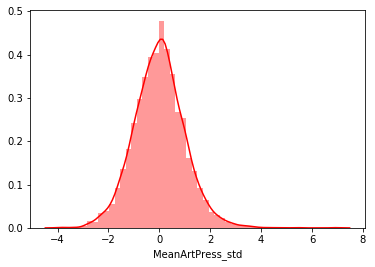

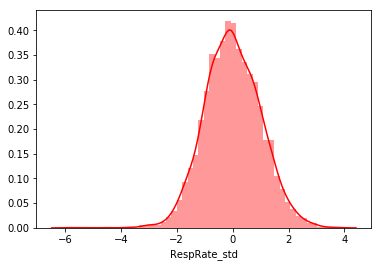

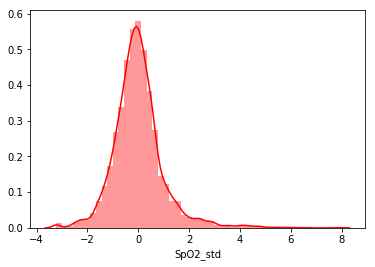

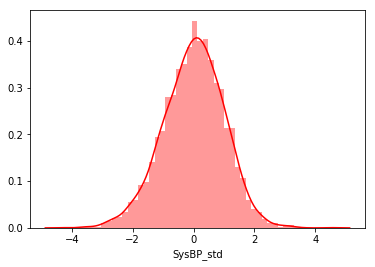

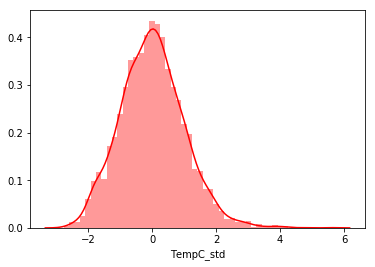

In [104]:
# # lets first look at the distribution of all of our variables
# import seaborn as sns
# import matplotlib.pyplot as plt
# train_df= pd.DataFrame(x, columns=list(train))

# for element in list(train_df):
#     #p1=sns.kdeplot(train_df[element], shade=True, color="r",label="{}".format(element))
#     p1=sns.distplot(train_df.loc[train_df[element].notnull(),element], color="r",label="{}".format(element))#shade=True,
#     plt.show()

### impute

In [208]:
def imputer_fxn(data, impute_type='mean'):
    """returns a dataframe where null values (np.nan) are filled in by the specified imputation technique (colwise)

    Keyword arguments:
    data -- the cleaned up vitals dataframe (dtype='dataframe', required)
    impute_type -- string specifying the imputation type (ie mean, median, most_frequent. (dtype='str', default='mean')
    """
    from sklearn.impute import SimpleImputer
       
    #impute
    imp = SimpleImputer(missing_values=np.nan, strategy='{}'.format(impute_type))
    data= imp.fit_transform(data)
    
    return(data)

In [209]:
x=imputer_fxn(x, impute_type='mean')
x_test=imputer_fxn(x_test,impute_type='mean')
#validate=imputer_fxn(validate, categorical=[],impute_type='median')

In [210]:
pd.DataFrame(x_test, columns=list(test)).isnull().sum().max()

0

In [211]:
pd.DataFrame(x, columns=list(train)).isnull().sum().max()

0

In [212]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [213]:
pd.DataFrame(x_test, columns=list(train)).max().max()

1483.6666666666667

In [214]:
pd.DataFrame(x, columns=list(train)).max().max()

950.75